In [688]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [1008]:
df = pd.read_csv("C:/Users/sreya/Downloads/6-10.csv")

In [1009]:
df

Title Experience  \
0                                Business Analyst    5-6 Yrs   
1                                Business Analyst    3-8 Yrs   
2                            Data Analyst - Legal   5-10 Yrs   
3                  Business Analyst - First Games    4-5 Yrs   
4                                    Data Analyst    3-5 Yrs   
...                                           ...        ...   
29140                               Sql Developer    3-8 Yrs   
29141                             Account Manager    2-7 Yrs   
29142     Hiring For Finance & Accounts Analyst!!   5-10 Yrs   
29143                         Hr Business Analyst    2-5 Yrs   
29144  Statistical Biostatistician/Epidemiologist    2-5 Yrs   

                                     Location  \
0                                        Pune   
1                                        Pune   
2                                        Pune   
3                                       Noida   
4                                        Pune   
...                                       ...   
29140                                  Remote   
29141                        Noida(Sector 63)   
29142                                   Noida   
29143  New Delhi(Kirti Nagar Industrial Area)   
29144                                  Remote   

                                   Company Name  \
0                                Leading Client   
1                 Accenture\n3.7\n64997 Reviews   
2                     Avantor\n3.6\n292 Reviews   
3                      Paytm\n3.3\n8279 Reviews   
4                     Wipro\n3.7\n58532 Reviews   
...                                         ...   
29140                        Green Hr Solutions   
29141  Radiance Papers Pvt. Ltd\n2.6\n2 Reviews   
29142                                  Dataflow   
29143                     Digta Wealth Networks   
29144                               Scale House   

                                                     URL  \
0      https://www.naukri.com/job-listings-business-a...   
1      https://www.naukri.com/job-listings-business-a...   
2      https://www.naukri.com/job-listings-data-analy...   
3      https://www.naukri.com/job-listings-business-a...   
4      https://www.naukri.com/job-listings-data-analy...   
...                                                  ...   
29140  https://www.naukri.com/job-listings-sql-develo...   
29141  https://www.naukri.com/job-listings-account-ma...   
29142  https://www.naukri.com/job-listings-hiring-for...   
29143  https://www.naukri.com/job-listings-hr-busines...   
29144  https://www.naukri.com/job-listings-statistica...   

                                                  Skills  \
0      Key Skills\nSkills highlighted with ‘‘ are pre...   
1      Key Skills\nSkills highlighted with ‘‘ are pre...   
2                                                      -   
3                                                      -   
4      Key Skills\nSkills highlighted with ‘‘ are pre...   
...                                                  ...   
29140  Key Skills\nSkills highlighted with ‘‘ are pre...   
29141  Key Skills\nSkills highlighted with ‘‘ are pre...   
29142                                                  -   
29143                           Key Skills\nHR Analytics   
29144  Key Skills\nSkills highlighted with ‘‘ are pre...   

                                           Qualification  \
0      Education\nUG: Any Graduate\nPG: Any Postgraduate   
1      Education\nUG: Any Graduate\nPG: Any Postgraduate   
2                                                      -   
3                                                      -   
4      Education\nUG: Any Graduate\nPG: Any Postgraduate   
...                                                  ...   
29140   Education\nUG: B.Tech/B.E. in Any Specialization   
29141  Education\nUG: Any Graduate\nPG: Any Postgraduate   
29142                                                  -   
29143                        Ed

In [1010]:
df.shape

(29145, 8)

##### We have checked the dimension of the dataset and it has 29145 Rows and 8 columns

In [1011]:
df.head(10)

Title Experience    Location  \
0                Business Analyst    5-6 Yrs        Pune   
1                Business Analyst    3-8 Yrs        Pune   
2            Data Analyst - Legal   5-10 Yrs        Pune   
3  Business Analyst - First Games    4-5 Yrs       Noida   
4                    Data Analyst    3-5 Yrs        Pune   
5          EGR - Business Analyst    6-8 Yrs   Bengaluru   
6                Business Analyst   4-10 Yrs   New Delhi   
7                Business Analyst    4-5 Yrs  Coimbatore   
8                Business Analyst   5-10 Yrs      Mumbai   
9                Business Analyst    1-4 Yrs   Mangaluru   

                              Company Name  \
0                           Leading Client   
1            Accenture\n3.7\n64997 Reviews   
2                Avantor\n3.6\n292 Reviews   
3                 Paytm\n3.3\n8279 Reviews   
4                Wipro\n3.7\n58532 Reviews   
5                Sapiens\n3.4\n514 Reviews   
6          Hero Fincorp\n4.0\n2098 Reviews   
7  Garudan Unmanned System\n3.7\n5 Reviews   
8                               Find Firms   
9                 Almasons\n2.5\n6 Reviews   

                                                 URL  \
0  https://www.naukri.com/job-listings-business-a...   
1  https://www.naukri.com/job-listings-business-a...   
2  https://www.naukri.com/job-listings-data-analy...   
3  https://www.naukri.com/job-listings-business-a...   
4  https://www.naukri.com/job-listings-data-analy...   
5  https://www.naukri.com/job-listings-egr-busine...   
6  https://www.naukri.com/job-listings-business-a...   
7  https://www.naukri.com/job-listings-business-a...   
8  https://www.naukri.com/job-listings-business-a...   
9  https://www.naukri.com/job-listings-business-a...   

                                              Skills  \
0  Key Skills\nSkills highlighted with ‘‘ are pre...   
1  Key Skills\nSkills highlighted with ‘‘ are pre...   
2                                                  -   
3                                                  -   
4  Key Skills\nSkills highlighted with ‘‘ are pre...   
5  Key Skills\nSkills highlighted with ‘‘ are pre...   
6  Key Skills\nSkills highlighted with ‘‘ are pre...   
7  Key Skills\nproject managementdata analysisdat...   
8  Key Skills\nproject managementdata analysisdat...   
9  Key Skills\nproject managementdata analysisdat...   

                                       Qualification          Job Role  
0  Education\nUG: Any Graduate\nPG: Any Postgraduate  Business Analyst  
1  Education\nUG: Any Graduate\nPG: Any Postgraduate  Business Analyst  
2                                                  -                 -  
3                                                  -                 -  
4  Education\nUG: Any Graduate\nPG: Any Postgraduate      Data Analyst  
5  Education\nUG: Any Graduate\nPG: Any Postgraduate  Business Analyst  
6             Education\nUG: Graduation Not Required  Business Analyst  
7  Education\nUG: Any Graduate\nPG: Any Postgraduate  Business Analyst  
8  Education\nUG: Any Graduate\nPG: Any Postgraduate  Business Analyst  
9  Education\nUG: Any Graduate\nPG: Any Postgraduate  Business Analyst

In [1012]:
Cmix = df["Company Name"].to_list()   

##### Here we appended the column named "Company Name" to an empty list Cmix

In [1013]:
Cmix

['Leading Client',
 'Accenture\n3.7\n64997 Reviews',
 'Avantor\n3.6\n292 Reviews',
 'Paytm\n3.3\n8279 Reviews',
 'Wipro\n3.7\n58532 Reviews',
 'Sapiens\n3.4\n514 Reviews',
 'Hero Fincorp\n4.0\n2098 Reviews',
 'Garudan Unmanned System\n3.7\n5 Reviews',
 'Find Firms',
 'Almasons\n2.5\n6 Reviews',
 'Accenture\n3.7\n64997 Reviews',
 'Accenture\n3.7\n64997 Reviews',
 'Accenture\n3.7\n64997 Reviews',
 'Accenture\n3.7\n64997 Reviews',
 'Accenture\n3.7\n64997 Reviews',
 'Accenture\n3.7\n64997 Reviews',
 'Accenture\n3.7\n64997 Reviews',
 'Accenture\n3.7\n64997 Reviews',
 'Accenture\n3.7\n64997 Reviews',
 'Accenture\n3.7\n64997 Reviews',
 'Accenture\n3.7\n64997 Reviews',
 'Accenture\n3.7\n64997 Reviews',
 'Accenture\n3.7\n64997 Reviews',
 'Almasons\n2.5\n6 Reviews',
 'Pioneer E Solutions\n3.5\n140 Reviews',
 'Tech Anand Rathi\n3.3\n73 Reviews',
 'Beinex\n3.0\n41 Reviews',
 'Accenture\n3.7\n64997 Reviews',
 'Cummins\n4.3\n3534 Reviews',
 'Circle K\n3.6\n36 Reviews',
 'Accenture\n3.7\n64997 Review

In [1014]:
comp = [i.split('\n')[0] for i in Cmix]

In [1015]:
comp

['Leading Client',
 'Accenture',
 'Avantor',
 'Paytm',
 'Wipro',
 'Sapiens',
 'Hero Fincorp',
 'Garudan Unmanned System',
 'Find Firms',
 'Almasons',
 'Accenture',
 'Accenture',
 'Accenture',
 'Accenture',
 'Accenture',
 'Accenture',
 'Accenture',
 'Accenture',
 'Accenture',
 'Accenture',
 'Accenture',
 'Accenture',
 'Accenture',
 'Almasons',
 'Pioneer E Solutions',
 'Tech Anand Rathi',
 'Beinex',
 'Accenture',
 'Cummins',
 'Circle K',
 'Accenture',
 'BP INCORPORATE INTERNATIONAL.',
 'BP INCORPORATE INTERNATIONAL.',
 'Capgemini',
 'Virtusa',
 'Capgemini',
 'Wipro',
 'Circle K',
 'Accenture',
 'Accenture',
 'Wipro',
 'Victrix Systems And Labs',
 'InfoCepts',
 'Barclays',
 'Programmers io',
 'Accenture',
 'Ashvini Magnets',
 'Accenture',
 'Accenture',
 'Virtusa',
 'Jade Global',
 'e Zest',
 'Circle K',
 'Accenture',
 'Accenture',
 'Accenture',
 'Xcaliber Infotech',
 'Accenture',
 'Accenture',
 'Leading Client',
 'ConnectWise',
 'Zectos Software',
 'Tek-analytix',
 'Accenture',
 'Accentur

In [1016]:
ratings = [i.split('\n')[1:2] for i in Cmix]

In [1017]:
ratings

[[],
 ['3.7'],
 ['3.6'],
 ['3.3'],
 ['3.7'],
 ['3.4'],
 ['4.0'],
 ['3.7'],
 [],
 ['2.5'],
 ['3.7'],
 ['3.7'],
 ['3.7'],
 ['3.7'],
 ['3.7'],
 ['3.7'],
 ['3.7'],
 ['3.7'],
 ['3.7'],
 ['3.7'],
 ['3.7'],
 ['3.7'],
 ['3.7'],
 ['2.5'],
 ['3.5'],
 ['3.3'],
 ['3.0'],
 ['3.7'],
 ['4.3'],
 ['3.6'],
 ['3.7'],
 [],
 [],
 ['3.7'],
 ['3.7'],
 ['3.7'],
 ['3.7'],
 ['3.6'],
 ['3.7'],
 ['3.7'],
 ['3.7'],
 ['4.6'],
 ['3.4'],
 ['3.9'],
 ['4.1'],
 ['3.7'],
 ['3.6'],
 ['3.7'],
 ['3.7'],
 ['3.7'],
 ['3.5'],
 ['4.0'],
 ['3.6'],
 ['3.7'],
 ['3.7'],
 ['3.7'],
 ['3.4'],
 ['3.7'],
 ['3.7'],
 [],
 ['4.2'],
 ['3.9'],
 ['2.8'],
 ['3.7'],
 ['3.7'],
 [],
 ['3.7'],
 ['5.0'],
 [],
 ['4.6'],
 ['3.4'],
 ['3.5'],
 ['2.2'],
 ['3.5'],
 ['3.7'],
 ['3.7'],
 [],
 ['3.5'],
 ['3.2'],
 ['3.2'],
 ['1.9'],
 [],
 [],
 [],
 ['4.0'],
 ['3.7'],
 [],
 ['3.9'],
 ['2.6'],
 ['3.4'],
 ['4.2'],
 ['3.7'],
 ['3.7'],
 [],
 [],
 ['3.9'],
 ['3.7'],
 ['3.7'],
 ['3.6'],
 ['3.2'],
 ['3.2'],
 ['3.2'],
 ['3.2'],
 ['3.2'],
 ['3.2'],
 ['3.2'],
 ['3.2'],


In [1018]:
df["Company"] = comp
df["Ratings"] = ratings
df.head()


Title Experience Location  \
0                Business Analyst    5-6 Yrs     Pune   
1                Business Analyst    3-8 Yrs     Pune   
2            Data Analyst - Legal   5-10 Yrs     Pune   
3  Business Analyst - First Games    4-5 Yrs    Noida   
4                    Data Analyst    3-5 Yrs     Pune   

                    Company Name  \
0                 Leading Client   
1  Accenture\n3.7\n64997 Reviews   
2      Avantor\n3.6\n292 Reviews   
3       Paytm\n3.3\n8279 Reviews   
4      Wipro\n3.7\n58532 Reviews   

                                                 URL  \
0  https://www.naukri.com/job-listings-business-a...   
1  https://www.naukri.com/job-listings-business-a...   
2  https://www.naukri.com/job-listings-data-analy...   
3  https://www.naukri.com/job-listings-business-a...   
4  https://www.naukri.com/job-listings-data-analy...   

                                              Skills  \
0  Key Skills\nSkills highlighted with ‘‘ are pre...   
1  Key Skills\nSkills highlighted with ‘‘ are pre...   
2                                                  -   
3                                                  -   
4  Key Skills\nSkills highlighted with ‘‘ are pre...   

                                       Qualification          Job Role  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate  Business Analyst   
1  Education\nUG: Any Graduate\nPG: Any Postgraduate  Business Analyst   
2                                                  -                 -   
3                                                  -                 -   
4  Education\nUG: Any Graduate\nPG: Any Postgraduate      Data Analyst   

          Company Ratings  
0  Leading Client      []  
1       Accenture   [3.7]  
2         Avantor   [3.6]  
3           Paytm   [3.3]  
4           Wipro   [3.7]

##### In the above steps we separated the company name and ratings from "Company Name" column in which both the data were present and assigned it in 2 different columns

In [1019]:
df = df.drop(["Company Name", "URL"],axis = 1)

##### Here in this step we dropped 2 unnecessary columns i.e. "Company Name" and "URL". Because we have already assigned the values that were in the "Company Name" Column into separate columns.

In [1020]:
df.head()

Title Experience Location  \
0                Business Analyst    5-6 Yrs     Pune   
1                Business Analyst    3-8 Yrs     Pune   
2            Data Analyst - Legal   5-10 Yrs     Pune   
3  Business Analyst - First Games    4-5 Yrs    Noida   
4                    Data Analyst    3-5 Yrs     Pune   

                                              Skills  \
0  Key Skills\nSkills highlighted with ‘‘ are pre...   
1  Key Skills\nSkills highlighted with ‘‘ are pre...   
2                                                  -   
3                                                  -   
4  Key Skills\nSkills highlighted with ‘‘ are pre...   

                                       Qualification          Job Role  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate  Business Analyst   
1  Education\nUG: Any Graduate\nPG: Any Postgraduate  Business Analyst   
2                                                  -                 -   
3                                                  -                 -   
4  Education\nUG: Any Graduate\nPG: Any Postgraduate      Data Analyst   

          Company Ratings  
0  Leading Client      []  
1       Accenture   [3.7]  
2         Avantor   [3.6]  
3           Paytm   [3.3]  
4           Wipro   [3.7]

In [1021]:
df["Salary"] = "6-10"

##### In this step we havve assigned the Salary range column to the dataset.

In [1022]:
df.head()

Title Experience Location  \
0                Business Analyst    5-6 Yrs     Pune   
1                Business Analyst    3-8 Yrs     Pune   
2            Data Analyst - Legal   5-10 Yrs     Pune   
3  Business Analyst - First Games    4-5 Yrs    Noida   
4                    Data Analyst    3-5 Yrs     Pune   

                                              Skills  \
0  Key Skills\nSkills highlighted with ‘‘ are pre...   
1  Key Skills\nSkills highlighted with ‘‘ are pre...   
2                                                  -   
3                                                  -   
4  Key Skills\nSkills highlighted with ‘‘ are pre...   

                                       Qualification          Job Role  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate  Business Analyst   
1  Education\nUG: Any Graduate\nPG: Any Postgraduate  Business Analyst   
2                                                  -                 -   
3                                                  -                 -   
4  Education\nUG: Any Graduate\nPG: Any Postgraduate      Data Analyst   

          Company Ratings Salary  
0  Leading Client      []   6-10  
1       Accenture   [3.7]   6-10  
2         Avantor   [3.6]   6-10  
3           Paytm   [3.3]   6-10  
4           Wipro   [3.7]   6-10

In [1023]:
ratings = [
    r[0] if r else None
    for r in ratings
]

In [1024]:
df["Ratings"] = ratings

##### In the above two steps we removed the square bracket from the ratings data so as to get a pure float values of the ratings data.

In [1025]:
df.head()

Title Experience Location  \
0                Business Analyst    5-6 Yrs     Pune   
1                Business Analyst    3-8 Yrs     Pune   
2            Data Analyst - Legal   5-10 Yrs     Pune   
3  Business Analyst - First Games    4-5 Yrs    Noida   
4                    Data Analyst    3-5 Yrs     Pune   

                                              Skills  \
0  Key Skills\nSkills highlighted with ‘‘ are pre...   
1  Key Skills\nSkills highlighted with ‘‘ are pre...   
2                                                  -   
3                                                  -   
4  Key Skills\nSkills highlighted with ‘‘ are pre...   

                                       Qualification          Job Role  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate  Business Analyst   
1  Education\nUG: Any Graduate\nPG: Any Postgraduate  Business Analyst   
2                                                  -                 -   
3                                                  -                 -   
4  Education\nUG: Any Graduate\nPG: Any Postgraduate      Data Analyst   

          Company Ratings Salary  
0  Leading Client    None   6-10  
1       Accenture     3.7   6-10  
2         Avantor     3.6   6-10  
3           Paytm     3.3   6-10  
4           Wipro     3.7   6-10

In [1026]:
df.head()

Title Experience Location  \
0                Business Analyst    5-6 Yrs     Pune   
1                Business Analyst    3-8 Yrs     Pune   
2            Data Analyst - Legal   5-10 Yrs     Pune   
3  Business Analyst - First Games    4-5 Yrs    Noida   
4                    Data Analyst    3-5 Yrs     Pune   

                                              Skills  \
0  Key Skills\nSkills highlighted with ‘‘ are pre...   
1  Key Skills\nSkills highlighted with ‘‘ are pre...   
2                                                  -   
3                                                  -   
4  Key Skills\nSkills highlighted with ‘‘ are pre...   

                                       Qualification          Job Role  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate  Business Analyst   
1  Education\nUG: Any Graduate\nPG: Any Postgraduate  Business Analyst   
2                                                  -                 -   
3                                                  -                 -   
4  Education\nUG: Any Graduate\nPG: Any Postgraduate      Data Analyst   

          Company Ratings Salary  
0  Leading Client    None   6-10  
1       Accenture     3.7   6-10  
2         Avantor     3.6   6-10  
3           Paytm     3.3   6-10  
4           Wipro     3.7   6-10

In [1027]:
exp = df["Experience"].to_list()

In [1028]:
exp_clean = [x.replace("Yrs","").strip() for x in exp]

In [1029]:
experience_mean = []

for x in exp_clean:
    try:
        low,high = x.split('-')
        mean_val = (int(low) + int(high)) / 2
        experience_mean.append(mean_val)
    except ValueError:
        experience_mean.append(None)

In [1030]:
df["Average Experience"] = experience_mean

In [1031]:
df = df.drop("Experience", axis = 1)

##### In the above steps, we have cleaned the experience column and converted the experience range to an average experience value.

In [1032]:
df = df.rename(columns = {"Job Role":"Roles"})

In [1033]:
df.head()

Title Location  \
0                Business Analyst     Pune   
1                Business Analyst     Pune   
2            Data Analyst - Legal     Pune   
3  Business Analyst - First Games    Noida   
4                    Data Analyst     Pune   

                                              Skills  \
0  Key Skills\nSkills highlighted with ‘‘ are pre...   
1  Key Skills\nSkills highlighted with ‘‘ are pre...   
2                                                  -   
3                                                  -   
4  Key Skills\nSkills highlighted with ‘‘ are pre...   

                                       Qualification             Roles  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate  Business Analyst   
1  Education\nUG: Any Graduate\nPG: Any Postgraduate  Business Analyst   
2                                                  -                 -   
3                                                  -                 -   
4  Education\nUG: Any Graduate\nPG: Any Postgraduate      Data Analyst   

          Company Ratings Salary  Average Experience  
0  Leading Client    None   6-10                 5.5  
1       Accenture     3.7   6-10                 5.5  
2         Avantor     3.6   6-10                 7.5  
3           Paytm     3.3   6-10                 4.5  
4           Wipro     3.7   6-10                 4.0

##### We have to initially follow the similar steps to every dataset for different salary ranges before joining them to form a single dataset.

## DataFrame for 10-15 LPA

In [210]:
df1 = pd.read_csv("C:/Users/sreya/Downloads/10-15.csv")

In [211]:
df1.head()

Title Experience  \
0                             EGR - Business Analyst    6-8 Yrs   
1  Hiring For Info Edge India - Aisle - Business ...    3-7 Yrs   
2                                   Business Analyst   5-10 Yrs   
3                                   Business Analyst    2-6 Yrs   
4                                   Business Analyst   5-10 Yrs   

                  Location                          Company Name  \
0                Bengaluru             Sapiens\n3.4\n517 Reviews   
1                Bengaluru          Info Edge\n3.9\n2174 Reviews   
2       Mumbai (All Areas)                  Slimes Infraprojects   
3  Pune(Hinjewadi Phase 2)  Kalolytic Solutions\n2.0\n14 Reviews   
4                   Mumbai                            Find Firms   

                                                 URL  \
0  https://www.naukri.com/job-listings-egr-busine...   
1  https://www.naukri.com/job-listings-hiring-for...   
2  https://www.naukri.com/job-listings-business-a...   
3  https://www.naukri.com/job-listings-business-a...   
4  https://www.naukri.com/job-listings-business-a...   

                                              Skills  \
0  Key Skills\nSkills highlighted with ‘‘ are pre...   
1                                                  -   
2  Key Skills\nSkills highlighted with ‘‘ are pre...   
3  Key Skills\nSkills highlighted with ‘‘ are pre...   
4  Key Skills\nproject managementdata analysisdat...   

                                       Qualification  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate   
1                                                  -   
2  Education\nUG: Any Graduate\nPG: MBA/PGDM in A...   
3  Education\nPG: MCA in Any Specialization, MBA/...   
4  Education\nUG: Any Graduate\nPG: Any Postgraduate   

                       Job Role  
0              Business Analyst  
1                             -  
2  eCommerce Operations - Other  
3      Customer Success Manager  
4              Business Analyst

In [212]:
Cmix = df1["Company Name"].to_list()

In [213]:
comp = [i.split('\n')[0] for i in Cmix]

In [214]:
ratings = [i.split('\n')[1:2] for i in Cmix]

In [215]:
df1["Company"] = comp
df1["Ratings"] = ratings

In [216]:
df1 = df1.drop(["Company Name", "URL"],axis = 1)

In [217]:
df1["Salary"] = "10-15"

In [218]:
ratings = [
    r[0] if r else None
    for r in ratings
]

In [219]:
df1["Ratings"] = ratings

In [220]:
exp = df1["Experience"].to_list()

In [221]:
exp_clean = [x.replace("Yrs","").strip() for x in exp]

In [222]:
experience_mean = []

for x in exp_clean:
    try:
        low,high = x.split('-')
        mean_val = (int(low) + int(high)) / 2
        experience_mean.append(mean_val)
    except ValueError:
        experience_mean.append(None)

In [223]:
df1["Average Experience"] = experience_mean
df1 = df1.drop("Experience", axis = 1)

In [226]:
df1 = df1.rename(columns = {"Job Role":"Roles"})

In [227]:
df1.head()

Title                 Location  \
0                             EGR - Business Analyst                Bengaluru   
1  Hiring For Info Edge India - Aisle - Business ...                Bengaluru   
2                                   Business Analyst       Mumbai (All Areas)   
3                                   Business Analyst  Pune(Hinjewadi Phase 2)   
4                                   Business Analyst                   Mumbai   

                                              Skills  \
0  Key Skills\nSkills highlighted with ‘‘ are pre...   
1                                                  -   
2  Key Skills\nSkills highlighted with ‘‘ are pre...   
3  Key Skills\nSkills highlighted with ‘‘ are pre...   
4  Key Skills\nproject managementdata analysisdat...   

                                       Qualification  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate   
1                                                  -   
2  Education\nUG: Any Graduate\nPG: MBA/PGDM in A...   
3  Education\nPG: MCA in Any Specialization, MBA/...   
4  Education\nUG: Any Graduate\nPG: Any Postgraduate   

                          Roles               Company Ratings Salary  \
0              Business Analyst               Sapiens     3.4  10-15   
1                             -             Info Edge     3.9  10-15   
2  eCommerce Operations - Other  Slimes Infraprojects    None  10-15   
3      Customer Success Manager   Kalolytic Solutions     2.0  10-15   
4              Business Analyst            Find Firms    None  10-15   

   Average Experience  
0                 7.0  
1                 5.0  
2                 7.5  
3                 4.0  
4                 7.5

## DataFrame for 25-50 LPA

In [228]:
df3 = pd.read_csv("C:/Users/sreya/Downloads/25-50.csv")

In [229]:
Cmix = df3["Company Name"].to_list()

In [230]:
comp = [str(i).split('\n')[0] for i in Cmix]

In [231]:
ratings = [str(i).split('\n')[1:2] for i in Cmix]

In [232]:
df3["Company"] = comp
df3["Ratings"] = ratings
df3.head()

Title Experience  \
0  S&C GN - Strategy - MC - Industry X - Smart Co...  10-14 Yrs   
1                AVP Business Analyst (Data Analyst)    4-8 Yrs   
2                                      Data Engineer   6-11 Yrs   
3                             Guidewire Data Analyst   7-12 Yrs   
4                                     Data Scientist    3-8 Yrs   

                              Location                   Company Name  \
0            Pune, Gurugram, Bengaluru  Accenture\n3.7\n65197 Reviews   
1                                 Pune    Barclays\n3.9\n1137 Reviews   
2                        Hybrid - Pune   UBS Group\n3.9\n3146 Reviews   
3  Hybrid - Hyderabad, Pune, Bengaluru      Zensar\n3.7\n2737 Reviews   
4                  Hyderabad, Gurugram     Pepsico\n4.0\n2820 Reviews   

                                                 URL  \
0  https://www.naukri.com/job-listings-s-c-gn-str...   
1  https://www.naukri.com/job-listings-avp-busine...   
2  https://www.naukri.com/job-listings-data-engin...   
3  https://www.naukri.com/job-listings-guidewire-...   
4  https://www.naukri.com/job-listings-data-scien...   

                                              Skills  \
0  Key Skills\nSkills highlighted with ‘‘ are pre...   
1  Key Skills\ntrellodata analyticsbusiness data ...   
2  Key Skills\nSkills highlighted with ‘‘ are pre...   
3  Key Skills\nSkills highlighted with ‘‘ are pre...   
4                                                  -   

                                       Qualification  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate   
1  Education\nUG: Any Graduate\nPG: Any Postgraduate   
2   Education\nUG: B.Tech/B.E. in Any Specialization   
3                        Education\nUG: Any Graduate   
4                                                  -   

                       Job Role    Company Ratings  
0              Strategy Manager  Accenture   [3.7]  
1                  Data Analyst   Barclays   [3.9]  
2                 Data Engineer  UBS Group   [3.9]  
3  Software Development - Other     Zensar   [3.7]  
4                             -    Pepsico   [4.0]

In [233]:
df3 = df3.drop(["Company Name", "URL"],axis = 1)

In [234]:
df3["Salary"] = "25-50"

In [235]:
ratings = [
    r[0] if r else None
    for r in ratings
]

In [236]:
df3["Ratings"] = ratings

In [237]:
exp = df3["Experience"].to_list()

In [238]:
exp_clean = [x.replace("Yrs","").strip() for x in exp]

In [239]:
experience_mean = []

for x in exp_clean:
    try:
        low,high = x.split('-')
        mean_val = (int(low) + int(high)) / 2
        experience_mean.append(mean_val)
    except ValueError:
        experience_mean.append(None)

In [240]:
df3["Average Experience"] = experience_mean
df3 = df3.drop("Experience", axis = 1)

In [241]:
df3 = df3.rename(columns = {"Job Role":"Roles"})

In [242]:
df3.head()

Title  \
0  S&C GN - Strategy - MC - Industry X - Smart Co...   
1                AVP Business Analyst (Data Analyst)   
2                                      Data Engineer   
3                             Guidewire Data Analyst   
4                                     Data Scientist   

                              Location  \
0            Pune, Gurugram, Bengaluru   
1                                 Pune   
2                        Hybrid - Pune   
3  Hybrid - Hyderabad, Pune, Bengaluru   
4                  Hyderabad, Gurugram   

                                              Skills  \
0  Key Skills\nSkills highlighted with ‘‘ are pre...   
1  Key Skills\ntrellodata analyticsbusiness data ...   
2  Key Skills\nSkills highlighted with ‘‘ are pre...   
3  Key Skills\nSkills highlighted with ‘‘ are pre...   
4                                                  -   

                                       Qualification  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate   
1  Education\nUG: Any Graduate\nPG: Any Postgraduate   
2   Education\nUG: B.Tech/B.E. in Any Specialization   
3                        Education\nUG: Any Graduate   
4                                                  -   

                          Roles    Company Ratings Salary  Average Experience  
0              Strategy Manager  Accenture     3.7  25-50                12.0  
1                  Data Analyst   Barclays     3.9  25-50                 6.0  
2                 Data Engineer  UBS Group     3.9  25-50                 8.5  
3  Software Development - Other     Zensar     3.7  25-50                 9.5  
4                             -    Pepsico     4.0  25-50                 5.5

## DataFrame for 50-75 LPA

In [55]:
df4 = pd.read_csv("C:/Users/sreya/Downloads/50-75.csv")

In [56]:
Cmix = df4["Company Name"].to_list()

In [57]:
comp = [str(i).split('\n')[0] for i in Cmix]

In [58]:
ratings = [i.split('\n')[1:2] for i in Cmix]

In [59]:
df4["Company"] = comp
df4["Ratings"] = ratings
df4.head()

Title Experience  \
0                    Competitive Intelligence  10-20 Yrs   
1  Full Stack Solutions Principal (Architect)  12-18 Yrs   
2     GTM Lead - GM/AVP -Offline Merchants QR   5-10 Yrs   
3              VP - Strategy & Transformation   9-14 Yrs   
4               Lead Principal Data Scientist   9-12 Yrs   

                   Location                   Company Name  \
0              Mumbai, Pune      eClerx\n3.2\n5558 Reviews   
1             Hybrid - Pune     Cummins\n4.3\n3547 Reviews   
2  Noida, Gurugram, Haryana       Paytm\n3.2\n8308 Reviews   
3                      Pune    Barclays\n3.9\n1137 Reviews   
4           Hyderabad, Pune  Cornerstone\n3.6\n143 Reviews   

                                                 URL  \
0  https://www.naukri.com/job-listings-competitiv...   
1  https://www.naukri.com/job-listings-full-stack...   
2  https://www.naukri.com/job-listings-gtm-lead-g...   
3  https://www.naukri.com/job-listings-vp-strateg...   
4  https://www.naukri.com/job-listings-lead-princ...   

                                              Skills  \
0                                                  -   
1  Key Skills\nSkills highlighted with ‘‘ are pre...   
2                                                  -   
3  Key Skills\nData analysisChange managementTeam...   
4  Key Skills\nSkills highlighted with ‘‘ are pre...   

                                       Qualification  \
0                                                  -   
1                        Education\nUG: Any Graduate   
2                                                  -   
3  Education\nUG: Any Graduate\nPG: Any Postgraduate   
4   Education\nUG: B.Tech/B.E. in Any Specialization   

                       Job Role      Company Ratings  
0                             -       eClerx   [3.2]  
1            Head - Engineering      Cummins   [4.3]  
2                             -        Paytm   [3.2]  
3  Strategic Management - Other     Barclays   [3.9]  
4                Data Scientist  Cornerstone   [3.6]

In [60]:
df4 = df4.drop(["Company Name", "URL"],axis = 1)

In [61]:
df4["Salary"] = "50-75"

In [62]:
ratings = [
    r[0] if r else None
    for r in ratings
]

In [63]:
df4["Ratings"] = ratings

In [64]:
exp = df4["Experience"].to_list()

In [65]:
exp_clean = [x.replace("Yrs","").strip() for x in exp]

In [66]:
experience_mean = []

for x in exp_clean:
    try:
        low,high = x.split('-')
        mean_val = (int(low) + int(high)) / 2
        experience_mean.append(mean_val)
    except ValueError:
        experience_mean.append(None)

In [67]:
df4["Average Experience"] = experience_mean
df4 = df4.drop("Experience", axis = 1)
df4.head()

Title                  Location  \
0                    Competitive Intelligence              Mumbai, Pune   
1  Full Stack Solutions Principal (Architect)             Hybrid - Pune   
2     GTM Lead - GM/AVP -Offline Merchants QR  Noida, Gurugram, Haryana   
3              VP - Strategy & Transformation                      Pune   
4               Lead Principal Data Scientist           Hyderabad, Pune   

                                              Skills  \
0                                                  -   
1  Key Skills\nSkills highlighted with ‘‘ are pre...   
2                                                  -   
3  Key Skills\nData analysisChange managementTeam...   
4  Key Skills\nSkills highlighted with ‘‘ are pre...   

                                       Qualification  \
0                                                  -   
1                        Education\nUG: Any Graduate   
2                                                  -   
3  Education\nUG: Any Graduate\nPG: Any Postgraduate   
4   Education\nUG: B.Tech/B.E. in Any Specialization   

                       Job Role      Company Ratings Salary  \
0                             -       eClerx     3.2  50-75   
1            Head - Engineering      Cummins     4.3  50-75   
2                             -        Paytm     3.2  50-75   
3  Strategic Management - Other     Barclays     3.9  50-75   
4                Data Scientist  Cornerstone     3.6  50-75   

   Average Experience  
0                15.0  
1                15.0  
2                 7.5  
3                11.5  
4                10.5

In [243]:
df4 = df4.rename(columns = {"Job Role":"Roles"})

## DataFrame for 75-100 LPA

In [68]:
df5 = pd.read_csv("C:/Users/sreya/Downloads/75-100.csv")
df5.head()

Title Experience  \
0                               Data Engineer   8-13 Yrs   
1                               Data Engineer   8-13 Yrs   
2  Presales GCP Data Cloud Solution Architect  10-17 Yrs   
3                              Data Scientist    3-7 Yrs   
4          Manager, Data Platform Engineering  10-18 Yrs   

                                            Location  \
0                                               Pune   
1                         Hyderabad, Pune, Bengaluru   
2                Hybrid - Hyderabad, Pune, Bengaluru   
3  Kolkata, Mumbai, New Delhi, Hyderabad, Pune, C...   
4                                      Hybrid - Pune   

                                    Company Name  \
0                        Codiste\n1.9\n2 Reviews   
1          The It Mind Services\n4.2\n15 Reviews   
2                   Datametica\n3.5\n386 Reviews   
3                          Leokraft Technologies   
4  MNC product development client of TPG Search.   

                                                 URL  \
0  https://www.naukri.com/job-listings-data-engin...   
1  https://www.naukri.com/job-listings-data-engin...   
2  https://www.naukri.com/job-listings-presales-g...   
3  https://www.naukri.com/job-listings-data-scien...   
4  https://www.naukri.com/job-listings-manager-da...   

                                              Skills  \
0  Key Skills\nTrainingData analysisgithubLinuxPo...   
1                Key Skills\nhivesparkSCALAHadoopSQL   
2  Key Skills\nSkills highlighted with ‘‘ are pre...   
3  Key Skills\nComputer sciencedata scienceGCPMac...   
4  Key Skills\nSkills highlighted with ‘‘ are pre...   

                                       Qualification  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate   
1  Education\nUG: Any Graduate\nPG: Any Postgraduate   
2                        Education\nUG: Any Graduate   
3  Education\nUG: Any Graduate\nPG: Any Postgraduate   
4   Education\nUG: B.Tech/B.E. in Any Specialization   

                           Job Role  
0                     Data Engineer  
1                     Data Engineer  
2                Solution Architect  
3         Full Stack Data Scientist  
4  Data Science & Analytics - Other

In [69]:
Cmix = df5["Company Name"].to_list()

In [70]:
comp = [str(i).split('\n')[0] for i in Cmix]

In [71]:
ratings = [i.split('\n')[1:2] for i in Cmix]

In [72]:
df5["Company"] = comp
df5["Ratings"] = ratings

In [73]:
df5 = df5.drop(["Company Name", "URL"],axis = 1)

In [74]:
df5["Salary"] = "75-100"

In [75]:
ratings = [
    r[0] if r else None
    for r in ratings
]

In [76]:
df5["Ratings"] = ratings

In [77]:
exp = df5["Experience"].to_list()

In [78]:
exp_clean = [x.replace("Yrs","").strip() for x in exp]

In [79]:
experience_mean = []

for x in exp_clean:
    try:
        low,high = x.split('-')
        mean_val = (int(low) + int(high)) / 2
        experience_mean.append(mean_val)
    except ValueError:
        experience_mean.append(None)

In [80]:
df5["Average Experience"] = experience_mean
df5 = df5.drop("Experience", axis = 1)
df5.head()

Title  \
0                               Data Engineer   
1                               Data Engineer   
2  Presales GCP Data Cloud Solution Architect   
3                              Data Scientist   
4          Manager, Data Platform Engineering   

                                            Location  \
0                                               Pune   
1                         Hyderabad, Pune, Bengaluru   
2                Hybrid - Hyderabad, Pune, Bengaluru   
3  Kolkata, Mumbai, New Delhi, Hyderabad, Pune, C...   
4                                      Hybrid - Pune   

                                              Skills  \
0  Key Skills\nTrainingData analysisgithubLinuxPo...   
1                Key Skills\nhivesparkSCALAHadoopSQL   
2  Key Skills\nSkills highlighted with ‘‘ are pre...   
3  Key Skills\nComputer sciencedata scienceGCPMac...   
4  Key Skills\nSkills highlighted with ‘‘ are pre...   

                                       Qualification  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate   
1  Education\nUG: Any Graduate\nPG: Any Postgraduate   
2                        Education\nUG: Any Graduate   
3  Education\nUG: Any Graduate\nPG: Any Postgraduate   
4   Education\nUG: B.Tech/B.E. in Any Specialization   

                           Job Role  \
0                     Data Engineer   
1                     Data Engineer   
2                Solution Architect   
3         Full Stack Data Scientist   
4  Data Science & Analytics - Other   

                                         Company Ratings  Salary  \
0                                        Codiste     1.9  75-100   
1                           The It Mind Services     4.2  75-100   
2                                     Datametica     3.5  75-100   
3                          Leokraft Technologies    None  75-100   
4  MNC product development client of TPG Search.    None  75-100   

   Average Experience  
0                10.5  
1                10.5  
2                13.5  
3                 5.0  
4                14.0

In [244]:
df5 = df5.rename(columns = {"Job Role":"Roles"})

## DataFrame for 1-5 cr

In [81]:
df7 = pd.read_csv("C:/Users/sreya/Downloads/1-5cr.csv")
df7.head()

Title Experience  \
0                Senior Vice President CAT Modelling  18-25 Yrs   
1                       Data & Analytics Lead, India  15-22 Yrs   
2                                      ODI developer    5-7 Yrs   
3                 Assistant Vice President Analytics  10-20 Yrs   
4  Sr. VP - Data Analytics (Insurance/ Financial ...  22-28 Yrs   

                                 Location  \
0   Hybrid - Pune, Bengaluru, Delhi / NCR   
1       Mumbai (All Areas)(Prabhadevi +1)   
2                                    Pune   
3  Singapore, Canada, United Kingdom (UK)   
4                             Delhi / NCR   

                                      Company Name  \
0  global provider of strategic operations support   
1                      Mondelez\n4.2\n1139 Reviews   
2                    ACL Digital\n3.6\n791 Reviews   
3                        VHR Professional Services   
4      A leading Insurance Consulting organization   

                                                 URL  \
0  https://www.naukri.com/job-listings-senior-vic...   
1  https://www.naukri.com/job-listings-data-analy...   
2  https://www.naukri.com/job-listings-odi-develo...   
3  https://www.naukri.com/job-listings-assistant-...   
4  https://www.naukri.com/job-listings-sr-vp-data...   

                                              Skills  \
0  Key Skills\nSkills highlighted with ‘‘ are pre...   
1  Key Skills\nSkills highlighted with ‘‘ are pre...   
2  Key Skills\nPerformance tuningChange managemen...   
3  Key Skills\nSkills highlighted with ‘‘ are pre...   
4  Key Skills\nSkills highlighted with ‘‘ are pre...   

                                       Qualification  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate   
1  Education\nUG: B.Tech/B.E. in Any Specializati...   
2  Education\nUG: Any Graduate\nPG: Any Postgraduate   
3                        Education\nUG: Any Graduate   
4                        Education\nUG: Any Graduate   

                           Job Role  
0      Strategic Management - Other  
1  Data Science & Analytics - Other  
2          Data warehouse Developer  
3             Head - Analytics / BI  
4             Head - Analytics / BI

In [82]:
Cmix = df7["Company Name"].to_list()

In [83]:
comp = [str(i).split('\n')[0] for i in Cmix]

In [84]:
ratings = [i.split('\n')[1:2] for i in Cmix]

In [85]:
df7["Company"] = comp
df7["Ratings"] = ratings

In [86]:
df7 = df7.drop(["Company Name", "URL"],axis = 1)

In [87]:
df7["Salary"] = "100-500"

In [88]:
ratings = [
    r[0] if r else None
    for r in ratings
]

In [89]:
df7["Ratings"] = ratings

In [90]:
exp = df7["Experience"].to_list()

In [91]:
exp_clean = [x.replace("Yrs","").strip() for x in exp]

In [92]:
experience_mean = []

for x in exp_clean:
    try:
        low,high = x.split('-')
        mean_val = (int(low) + int(high)) / 2
        experience_mean.append(mean_val)
    except ValueError:
        experience_mean.append(None)

In [93]:
df7["Average Experience"] = experience_mean
df7 = df7.drop("Experience", axis = 1)
df7.head()

Title  \
0                Senior Vice President CAT Modelling   
1                       Data & Analytics Lead, India   
2                                      ODI developer   
3                 Assistant Vice President Analytics   
4  Sr. VP - Data Analytics (Insurance/ Financial ...   

                                 Location  \
0   Hybrid - Pune, Bengaluru, Delhi / NCR   
1       Mumbai (All Areas)(Prabhadevi +1)   
2                                    Pune   
3  Singapore, Canada, United Kingdom (UK)   
4                             Delhi / NCR   

                                              Skills  \
0  Key Skills\nSkills highlighted with ‘‘ are pre...   
1  Key Skills\nSkills highlighted with ‘‘ are pre...   
2  Key Skills\nPerformance tuningChange managemen...   
3  Key Skills\nSkills highlighted with ‘‘ are pre...   
4  Key Skills\nSkills highlighted with ‘‘ are pre...   

                                       Qualification  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate   
1  Education\nUG: B.Tech/B.E. in Any Specializati...   
2  Education\nUG: Any Graduate\nPG: Any Postgraduate   
3                        Education\nUG: Any Graduate   
4                        Education\nUG: Any Graduate   

                           Job Role  \
0      Strategic Management - Other   
1  Data Science & Analytics - Other   
2          Data warehouse Developer   
3             Head - Analytics / BI   
4             Head - Analytics / BI   

                                           Company Ratings   Salary  \
0  global provider of strategic operations support    None  100-500   
1                                         Mondelez     4.2  100-500   
2                                      ACL Digital     3.6  100-500   
3                        VHR Professional Services    None  100-500   
4      A leading Insurance Consulting organization    None  100-500   

   Average Experience  
0                21.5  
1                18.5  
2                 6.0  
3                15.0  
4                25.0

In [245]:
df7 = df7.rename(columns = {"Job Role":"Roles"})

## DataFrame for 0-3 LPA

In [134]:
df8 = pd.read_csv("0_3.csv")
df8.head()

Title Experience  \
0                         Business Analyst    3-4 Yrs   
1                         Business Analyst    0-3 Yrs   
2                             Data Analyst    1-3 Yrs   
3  Business Analyst / Analytics Specialist    0-3 Yrs   
4                             Data Analyst    1-4 Yrs   

                                            Location  \
0                            Mumbai, New Delhi, Pune   
1                                Mumbai, Navi Mumbai   
2                                               Pune   
3                                              Noida   
4  Hyderabad, Coimbatore, Thodupuzha, Thiruvanant...   

                                         Company  Ratings  \
0                                 Flash Aligners       []   
1                                  Osource India  ['3.5']   
2                                    Sfour Media  ['3.5']   
3                                      Zenon LLC  ['3.1']   
4  Cindrebay School Of Fashion & Interior Design  ['3.7']   

                                                 URL  \
0  https://www.naukri.com/job-listings-business-a...   
1  https://www.naukri.com/job-listings-business-a...   
2  https://www.naukri.com/job-listings-data-analy...   
3  https://www.naukri.com/job-listings-business-a...   
4  https://www.naukri.com/job-listings-data-analy...   

                           Roles  \
0               Business Analyst   
1                            NaN   
2                   Data Analyst   
3               Business Analyst   
4  Database Architect / Designer   

                                              Skills  \
0  Key Skills\nfinancial analysiserpdata analysis...   
1  Key Skills\nproject managementdata analysisdat...   
2  Key Skills\ndatabase maintenancepythondata ana...   
3  Key Skills\nAnalytical skillsBusiness AnalystA...   
4  Key Skills\nSecondary DataDatabase Design Deve...   

                                       Qualification  
0  Education\nUG: Any Graduate\nPG: MBA/PGDM in M...  
1                                                NaN  
2  Education\nUG: Any Graduate\nPG: Any Postgraduate  
3  Education\nUG: Any Graduate\nPG: Any Postgraduate  
4  Education\nUG: Any Graduate\nPG: Any Postgraduate

In [135]:
ratings = df8["Ratings"].to_list()

In [136]:
clean_ratings = [float(x.strip("[]'")) if x != '[]' else None for x in ratings]


In [137]:
df8["Ratings"] = clean_ratings

In [138]:
df8["Salary"] = "0-3"

In [139]:
exp = df8["Experience"].to_list()

In [140]:
exp_clean = [x.replace("Yrs","").strip() for x in exp]

In [141]:
experience_mean = []

for x in exp_clean:
    try:
        low,high = x.split('-')
        mean_val = (int(low) + int(high)) / 2
        experience_mean.append(mean_val)
    except ValueError:
        experience_mean.append(None)

In [142]:
df8["Average Experience"] = experience_mean
df8 = df8.drop("Experience", axis = 1)
df8 = df8.drop("URL",axis = 1)
df8.head()

Title  \
0                         Business Analyst   
1                         Business Analyst   
2                             Data Analyst   
3  Business Analyst / Analytics Specialist   
4                             Data Analyst   

                                            Location  \
0                            Mumbai, New Delhi, Pune   
1                                Mumbai, Navi Mumbai   
2                                               Pune   
3                                              Noida   
4  Hyderabad, Coimbatore, Thodupuzha, Thiruvanant...   

                                         Company  Ratings  \
0                                 Flash Aligners      NaN   
1                                  Osource India      3.5   
2                                    Sfour Media      3.5   
3                                      Zenon LLC      3.1   
4  Cindrebay School Of Fashion & Interior Design      3.7   

                           Roles  \
0               Business Analyst   
1                            NaN   
2                   Data Analyst   
3               Business Analyst   
4  Database Architect / Designer   

                                              Skills  \
0  Key Skills\nfinancial analysiserpdata analysis...   
1  Key Skills\nproject managementdata analysisdat...   
2  Key Skills\ndatabase maintenancepythondata ana...   
3  Key Skills\nAnalytical skillsBusiness AnalystA...   
4  Key Skills\nSecondary DataDatabase Design Deve...   

                                       Qualification Salary  \
0  Education\nUG: Any Graduate\nPG: MBA/PGDM in M...    0-3   
1                                                NaN    0-3   
2  Education\nUG: Any Graduate\nPG: Any Postgraduate    0-3   
3  Education\nUG: Any Graduate\nPG: Any Postgraduate    0-3   
4  Education\nUG: Any Graduate\nPG: Any Postgraduate    0-3   

   Average Experience  
0                 3.5  
1                 1.5  
2                 2.0  
3                 1.5  
4                 2.5

## DataFrame for 3-6 LPA

In [146]:
df6 = pd.read_csv("C:/Users/sreya/3-6.csv")
df6.head()

Title Experience         Location  \
0             Data Analyst - B    2-5 Yrs             Pune   
1  Wfm Team Lead RTA/Scheduler    3-7 Yrs  Pune(Hinjewadi)   
2                      Analyst    0-3 Yrs             Pune   
3             Business Analyst    3-8 Yrs             Pune   
4                 Data Analyst    2-6 Yrs             Pune   

                        Company Name  \
0      Capgemini\n3.7\n47622 Reviews   
1  Tech Mahindra\n3.5\n39249 Reviews   
2          eClerx\n3.2\n5563 Reviews   
3      Accenture\n3.7\n65309 Reviews   
4         Cummins\n4.3\n3557 Reviews   

                                              Skills  \
0  Key Skills\nSkills highlighted with ‘‘ are pre...   
1  Key Skills\nSkills highlighted with ‘‘ are pre...   
2                                                  -   
3  Key Skills\nSkills highlighted with ‘‘ are pre...   
4  Key Skills\nSkills highlighted with ‘‘ are pre...   

                                       Qualification  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate   
1                        Education\nUG: Any Graduate   
2                                                  -   
3  Education\nUG: Any Graduate\nPG: Any Postgraduate   
4  Education\nUG: Any Graduate\nPG: Any Postgraduate   

                     Job Role  
0                Data Analyst  
1  Operations Support - Other  
2                           -  
3            Business Analyst  
4                Data Analyst

In [148]:
df6 = df6.rename(columns={"Job Role":"Roles"})

In [149]:
Cmix = df6["Company Name"].to_list()

In [150]:
comp = [str(i).split('\n')[0] for i in Cmix]
ratings = [i.split('\n')[1:2] for i in Cmix]

In [151]:
df6["Company"] = comp
df6["Ratings"] = ratings

In [152]:
df6 = df6.drop("Company Name",axis = 1)

In [153]:
df6["Salary"] = "3-6"

In [154]:
ratings = df6["Ratings"].to_list()

In [155]:
ratings = [
    r[0] if r else None
    for r in ratings
]

In [156]:
df6['Ratings'] = ratings

In [157]:
exp = df6["Experience"].to_list()

In [158]:
exp_clean = [x.replace("Yrs","").strip() for x in exp]

In [159]:
experience_mean = []

for x in exp_clean:
    try:
        low,high = x.split('-')
        mean_val = (int(low) + int(high)) / 2
        experience_mean.append(mean_val)
    except ValueError:
        experience_mean.append(None)

In [160]:
df6["Average Experience"] = experience_mean
df6 = df6.drop("Experience", axis = 1)
df6.head()

Title         Location  \
0             Data Analyst - B             Pune   
1  Wfm Team Lead RTA/Scheduler  Pune(Hinjewadi)   
2                      Analyst             Pune   
3             Business Analyst             Pune   
4                 Data Analyst             Pune   

                                              Skills  \
0  Key Skills\nSkills highlighted with ‘‘ are pre...   
1  Key Skills\nSkills highlighted with ‘‘ are pre...   
2                                                  -   
3  Key Skills\nSkills highlighted with ‘‘ are pre...   
4  Key Skills\nSkills highlighted with ‘‘ are pre...   

                                       Qualification  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate   
1                        Education\nUG: Any Graduate   
2                                                  -   
3  Education\nUG: Any Graduate\nPG: Any Postgraduate   
4  Education\nUG: Any Graduate\nPG: Any Postgraduate   

                        Roles        Company Ratings Salary  \
0                Data Analyst      Capgemini     3.7    3-6   
1  Operations Support - Other  Tech Mahindra     3.5    3-6   
2                           -         eClerx     3.2    3-6   
3            Business Analyst      Accenture     3.7    3-6   
4                Data Analyst        Cummins     4.3    3-6   

   Average Experience  
0                 3.5  
1                 5.0  
2                 1.5  
3                 5.5  
4                 4.0

## DataFrame for 15-25 LPA

In [161]:
df2 = pd.read_csv("C:/Users/sreya/Downloads/15-25final.csv")

In [162]:
df2.head()

Title Experience  \
0  Hiring For Info Edge India - Aisle - Business ...    3-7 Yrs   
1                                   Business Analyst   5-10 Yrs   
2                     AI AND DATA Scientist Engineer    5-7 Yrs   
3                 Data Engineer (Python with Gen AI)    2-6 Yrs   
4                                     Data Scientist    3-5 Yrs   

                     Location  \
0                   Bengaluru   
1                     Chennai   
2     Pune(Hinjewadi Phase 1)   
3  Hyderabad, Pune, Bengaluru   
4                        Pune   

                                        Company Name  \
0                   Info Edge\r\n3.9\r\n2177 Reviews   
1  Billedright Healthcare Solutions\r\n4.2\r\n69 ...   
2                       Coreehs\r\n3.9\r\n80 Reviews   
3                  Capgemini\r\n3.7\r\n47630 Reviews   
4                 Globallogic\r\n3.6\r\n5135 Reviews   

                                                 URL  \
0  https://www.naukri.com/job-listings-hiring-for...   
1  https://www.naukri.com/job-listings-business-a...   
2  https://www.naukri.com/job-listings-ai-and-dat...   
3  https://www.naukri.com/job-listings-data-engin...   
4  https://www.naukri.com/job-listings-data-scien...   

                                              Skills  \
0  Key Skills\r\nSkills highlighted with ‘‘ are p...   
1                                                  -   
2  Key Skills\r\nSkills highlighted with ‘‘ are p...   
3                                                  -   
4  Key Skills\r\nSkills highlighted with ‘‘ are p...   

                                       Qualification          job role  
0                      Education\r\nUG: Any Graduate  Business Analyst  
1                                                  -                 -  
2                      Education\r\nUG: Any Graduate  Business Analyst  
3                                                  -                 -  
4  Education\r\nUG: B.Tech/B.E. in Any Specializa...     Data Engineer

In [163]:
Cmix = df2["Company Name"].to_list()

In [164]:
comp = [str(i).split('\r')[0] for i in Cmix]

In [165]:
ratings = [str(i).split('\r\n')[1:2] for i in Cmix]

In [166]:
df2["Company"] = comp
df2["Ratings"] = ratings
df2.head()

Title Experience  \
0  Hiring For Info Edge India - Aisle - Business ...    3-7 Yrs   
1                                   Business Analyst   5-10 Yrs   
2                     AI AND DATA Scientist Engineer    5-7 Yrs   
3                 Data Engineer (Python with Gen AI)    2-6 Yrs   
4                                     Data Scientist    3-5 Yrs   

                     Location  \
0                   Bengaluru   
1                     Chennai   
2     Pune(Hinjewadi Phase 1)   
3  Hyderabad, Pune, Bengaluru   
4                        Pune   

                                        Company Name  \
0                   Info Edge\r\n3.9\r\n2177 Reviews   
1  Billedright Healthcare Solutions\r\n4.2\r\n69 ...   
2                       Coreehs\r\n3.9\r\n80 Reviews   
3                  Capgemini\r\n3.7\r\n47630 Reviews   
4                 Globallogic\r\n3.6\r\n5135 Reviews   

                                                 URL  \
0  https://www.naukri.com/job-listings-hiring-for...   
1  https://www.naukri.com/job-listings-business-a...   
2  https://www.naukri.com/job-listings-ai-and-dat...   
3  https://www.naukri.com/job-listings-data-engin...   
4  https://www.naukri.com/job-listings-data-scien...   

                                              Skills  \
0  Key Skills\r\nSkills highlighted with ‘‘ are p...   
1                                                  -   
2  Key Skills\r\nSkills highlighted with ‘‘ are p...   
3                                                  -   
4  Key Skills\r\nSkills highlighted with ‘‘ are p...   

                                       Qualification          job role  \
0                      Education\r\nUG: Any Graduate  Business Analyst   
1                                                  -                 -   
2                      Education\r\nUG: Any Graduate  Business Analyst   
3                                                  -                 -   
4  Education\r\nUG: B.Tech/B.E. in Any Specializa...     Data Engineer   

                            Company Ratings  
0                         Info Edge   [3.9]  
1  Billedright Healthcare Solutions   [4.2]  
2                           Coreehs   [3.9]  
3                         Capgemini   [3.7]  
4                       Globallogic   [3.6]

In [167]:
df2 = df2.drop("Company Name",axis = 1)

In [168]:
df2["Salary"] = "15-25"

In [169]:
ratings = [
    r[0] if r else None
    for r in ratings
]

In [170]:
df2["Ratings"] = ratings

In [171]:
exp = df2["Experience"].to_list()

In [172]:
exp_clean = [x.replace("Yrs","").strip() for x in exp]

In [173]:
experience_mean = []

for x in exp_clean:
    try:
        low,high = x.split('-')
        mean_val = (int(low) + int(high)) / 2
        experience_mean.append(mean_val)
    except ValueError:
        experience_mean.append(None)

In [174]:
df2["Average Experience"] = experience_mean
df2 = df2.drop("Experience", axis = 1)
df2 = df2.rename(columns={"job role": "Job Role"})
df2.head()

Title  \
0  Hiring For Info Edge India - Aisle - Business ...   
1                                   Business Analyst   
2                     AI AND DATA Scientist Engineer   
3                 Data Engineer (Python with Gen AI)   
4                                     Data Scientist   

                     Location  \
0                   Bengaluru   
1                     Chennai   
2     Pune(Hinjewadi Phase 1)   
3  Hyderabad, Pune, Bengaluru   
4                        Pune   

                                                 URL  \
0  https://www.naukri.com/job-listings-hiring-for...   
1  https://www.naukri.com/job-listings-business-a...   
2  https://www.naukri.com/job-listings-ai-and-dat...   
3  https://www.naukri.com/job-listings-data-engin...   
4  https://www.naukri.com/job-listings-data-scien...   

                                              Skills  \
0  Key Skills\r\nSkills highlighted with ‘‘ are p...   
1                                                  -   
2  Key Skills\r\nSkills highlighted with ‘‘ are p...   
3                                                  -   
4  Key Skills\r\nSkills highlighted with ‘‘ are p...   

                                       Qualification          Job Role  \
0                      Education\r\nUG: Any Graduate  Business Analyst   
1                                                  -                 -   
2                      Education\r\nUG: Any Graduate  Business Analyst   
3                                                  -                 -   
4  Education\r\nUG: B.Tech/B.E. in Any Specializa...     Data Engineer   

                            Company Ratings Salary  Average Experience  
0                         Info Edge     3.9  15-25                 5.0  
1  Billedright Healthcare Solutions     4.2  15-25                 7.5  
2                           Coreehs     3.9  15-25                 6.0  
3                         Capgemini     3.7  15-25                 4.0  
4                       Globallogic     3.6  15-25                 4.0

In [176]:
df2 = df2.drop("URL",axis = 1)
df2 = df2.rename(columns={"Job Role":"Roles"})

In [177]:
df2.head()

Title  \
0  Hiring For Info Edge India - Aisle - Business ...   
1                                   Business Analyst   
2                     AI AND DATA Scientist Engineer   
3                 Data Engineer (Python with Gen AI)   
4                                     Data Scientist   

                     Location  \
0                   Bengaluru   
1                     Chennai   
2     Pune(Hinjewadi Phase 1)   
3  Hyderabad, Pune, Bengaluru   
4                        Pune   

                                              Skills  \
0  Key Skills\r\nSkills highlighted with ‘‘ are p...   
1                                                  -   
2  Key Skills\r\nSkills highlighted with ‘‘ are p...   
3                                                  -   
4  Key Skills\r\nSkills highlighted with ‘‘ are p...   

                                       Qualification             Roles  \
0                      Education\r\nUG: Any Graduate  Business Analyst   
1                                                  -                 -   
2                      Education\r\nUG: Any Graduate  Business Analyst   
3                                                  -                 -   
4  Education\r\nUG: B.Tech/B.E. in Any Specializa...     Data Engineer   

                            Company Ratings Salary  Average Experience  
0                         Info Edge     3.9  15-25                 5.0  
1  Billedright Healthcare Solutions     4.2  15-25                 7.5  
2                           Coreehs     3.9  15-25                 6.0  
3                         Capgemini     3.7  15-25                 4.0  
4                       Globallogic     3.6  15-25                 4.0

## Joining of all the DataFrames into a single one

In [570]:
final_df = pd.concat([df, df1,df2, df3, df4, df5,df6, df7,df8], ignore_index=True)
final_df.head()

Title Location  \
0                Business Analyst     Pune   
1                Business Analyst     Pune   
2            Data Analyst - Legal     Pune   
3  Business Analyst - First Games    Noida   
4                    Data Analyst     Pune   

                                              Skills  \
0  Key Skills\nSkills highlighted with ‘‘ are pre...   
1  Key Skills\nSkills highlighted with ‘‘ are pre...   
2                                                  -   
3                                                  -   
4  Key Skills\nSkills highlighted with ‘‘ are pre...   

                                       Qualification             Roles  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate  Business Analyst   
1  Education\nUG: Any Graduate\nPG: Any Postgraduate  Business Analyst   
2                                                  -                 -   
3                                                  -                 -   
4  Education\nUG: Any Graduate\nPG: Any Postgraduate      Data Analyst   

          Company Ratings Salary  Average Experience  
0  Leading Client    None   6-10                 5.5  
1       Accenture     3.7   6-10                 5.5  
2         Avantor     3.6   6-10                 7.5  
3           Paytm     3.3   6-10                 4.5  
4           Wipro     3.7   6-10                 4.0

In [571]:
final_df.shape

(84814, 9)

In [572]:
final_df = final_df.sample(frac=1).reset_index(drop=True)
final_df

Title      Location  \
0                                       AI Data Engineer      Gurugram   
1                                          Product Owner     Hyderabad   
2                             Senior Staff Engineer - IT         Noida   
3                            Senior Solutions Consultant     Hyderabad   
4      Senior Expert Data Science, Modeling & Simulation        Mumbai   
...                                                  ...           ...   
84809                                BA-Health Insurance      Goregaon   
84810                             Lead Financial Analyst  Nagarkurnool   
84811                                     Senior Analyst     Kandivali   
84812                               Senior Data Engineer     Bengaluru   
84813                    Sr Specialist Quality Assurance     Bengaluru   

                                                  Skills  \
0      Key Skills\nCustomer experience managementOper...   
1                                                      -   
2      Key Skills\nFinancial advisoryClient handlingT...   
3                                                      -   
4                                                      -   
...                                                  ...   
84809  Key Skills\nSkills highlighted with ‘‘ are pre...   
84810  Key Skills\nSkills highlighted with ‘‘ are pre...   
84811                                                  -   
84812  Key Skills\nEngineering servicesManager Qualit...   
84813  Key Skills\nData analysisAutomationProcess imp...   

                                           Qualification  \
0      Education\nUG: Any Graduate\nPG: Any Postgraduate   
1                                                      -   
2      Education\nUG: Any Graduate\nPG: MBA/PGDM in A...   
3                                                      -   
4                                                      -   
...                                                  ...   
84809                        Education\nUG: Any Graduate   
84810  Education\nUG: B.A in Economics, B.Com in Any ...   
84811                                                  -   
84812  Education\nUG: Any Graduate\nPG: Any Postgraduate   
84813  Education\nUG: Any Graduate\nPG: Any Postgraduate   

                                         Roles                     Company  \
0      Data Science & Machine Learning - Other        Teleperformance (TP)   
1                                            -                      Incedo   
2                             Business Analyst                      R1 RCM   
3                                            -             Syren Cloud Inc   
4                                            -                    NOVARTIS   
...                                        ...                         ...   
84809      BFSI, Investments & Trading - Other                 E-solutions   
84810                        Financial Analyst                 OSI Systems   
84811                                        -                      eClerx   
84812                            Data Engineer    Eurofins Digital Testing   
84813    Data warehouse Architect / Consultant  ATT Communication Services   

      Ratings Salary  Average Experience  
0         3.9   6-10                 3.5  
1         3.0  15-25                 5.0  
2         3.8   6-10                 4.5  
3         3.8   6-10                 6.5  
4         4.1  10-15                 4.5  
...       ...    ...                 ...  
84809    None   6-10                 6.5  
84810     3.8  25-50                 7.5  
84811     3.2  10-15                 8.5  
84812     3.6   6-10                 8.5  
84813     4.0    3-6                 4.5  

[84814 rows x 9 columns]

##### Generalising the data in columns

In [573]:
final_df["Qualification"].unique()

array(['Education\nUG: Any Graduate\nPG: Any Postgraduate', '-',
       'Education\nUG: Any Graduate\nPG: MBA/PGDM in Any Specialization',
       ...,
       'Education\nUG: B.Com in Any Specialization, B.A in Economics\nPG: ICWA (CMA) in Any Specialization, CA in Any Specialization, M.Com in Any Specialization, MBA/PGDM in Any Specialization',
       'Education\nUG: B.Tech/B.E. in Production/Industrial\nPG: MBA/PGDM in Marketing, MCA in Computers, M.Tech in Electronics/Telecommunication',
       'Education\nUG: BAMS in Any Specialization, Any Graduate, BDS in Any Specialization\nPG: MBA/PGDM in Any Specialization'],
      dtype=object)

In [574]:
final_df["Qualification"].nunique()

3031

In [575]:
final_df[["Education_UG", "Education_PG"]] = final_df["Qualification"].str.extract(r"UG:\s*(.*?)\s*(?:PG:|$)|PG:\s*(.*)")

In [576]:
final_df

Title      Location  \
0                                       AI Data Engineer      Gurugram   
1                                          Product Owner     Hyderabad   
2                             Senior Staff Engineer - IT         Noida   
3                            Senior Solutions Consultant     Hyderabad   
4      Senior Expert Data Science, Modeling & Simulation        Mumbai   
...                                                  ...           ...   
84809                                BA-Health Insurance      Goregaon   
84810                             Lead Financial Analyst  Nagarkurnool   
84811                                     Senior Analyst     Kandivali   
84812                               Senior Data Engineer     Bengaluru   
84813                    Sr Specialist Quality Assurance     Bengaluru   

                                                  Skills  \
0      Key Skills\nCustomer experience managementOper...   
1                                                      -   
2      Key Skills\nFinancial advisoryClient handlingT...   
3                                                      -   
4                                                      -   
...                                                  ...   
84809  Key Skills\nSkills highlighted with ‘‘ are pre...   
84810  Key Skills\nSkills highlighted with ‘‘ are pre...   
84811                                                  -   
84812  Key Skills\nEngineering servicesManager Qualit...   
84813  Key Skills\nData analysisAutomationProcess imp...   

                                           Qualification  \
0      Education\nUG: Any Graduate\nPG: Any Postgraduate   
1                                                      -   
2      Education\nUG: Any Graduate\nPG: MBA/PGDM in A...   
3                                                      -   
4                                                      -   
...                                                  ...   
84809                        Education\nUG: Any Graduate   
84810  Education\nUG: B.A in Economics, B.Com in Any ...   
84811                                                  -   
84812  Education\nUG: Any Graduate\nPG: Any Postgraduate   
84813  Education\nUG: Any Graduate\nPG: Any Postgraduate   

                                         Roles                     Company  \
0      Data Science & Machine Learning - Other        Teleperformance (TP)   
1                                            -                      Incedo   
2                             Business Analyst                      R1 RCM   
3                                            -             Syren Cloud Inc   
4                                            -                    NOVARTIS   
...                                        ...                         ...   
84809      BFSI, Investments & Trading - Other                 E-solutions   
84810                        Financial Analyst                 OSI Systems   
84811                                        -                      eClerx   
84812                            Data Engineer    Eurofins Digital Testing   
84813    Data warehouse Architect / Consultant  ATT Communication Services   

      Ratings Salary  Average Experience  \
0         3.9   6-10                 3.5   
1         3.0  15-25                 5.0   
2         3.8   6-10                 4.5   
3         3.8   6-10                 6.5   
4         4.1  10-15                 4.5   
...       ...    ...                 ...   
84809    None   6-10                 6.5   
84810     3.8  25-50                 7.5   
84811     3.2  10-15                 8.5   
84812     3.6   6-10                 8.5   
84813     4.0    3-6                 4.5   

                                        Education_UG Education_PG  
0                                       Any Graduate          NaN  
1                                                NaN          NaN  
2                                       Any Gradua

##### Here we divided the Qualification into two columns to store UG and PG education separately

In [577]:
def normalize_degree(text):
    if pd.isna(text) or text.strip() == "" or text.strip() == "-":
        return np.nan
    
    replacements = {
        r"B\.Tech.*|B\.E.*": "B.Tech",
        r"B\.Sc.*": "B.Sc",
        r"B\.Com.*": "B.Com",
        r"B\.A.*": "B.A",
        r"M\.Tech.*": "M.Tech",
        r"MBA/PGDM.*": "MBA",
        r"M\.Com.*": "M.Com",
        r"MCA.*": "MCA",
        r"CA.*": "CA",
        r"CS.*": "CS",
        r"ICWA.*": "ICWA",
        r"MS/M\.Sc.*|M\.Sc.*": "M.Sc",
        r"Medical-MS/MD.*": "MD",
        r"Diploma.*": "Diploma",
        r"Any Graduate.*": "Any Graduate",
        r"Any Postgraduate.*": "Any Postgraduate",
        r"Graduation Not Required": "No Graduation Required",
        r"PG Diploma.*": "PG Diploma",
        r"Ph\.D.*": "PhD",
        r"BBA.*|B\.B\.A.*": "BBA",
        r"LLB.*": "LLB"
    }

    for pattern, replacement in replacements.items():
        if re.search(pattern, text, flags=re.IGNORECASE):
            return replacement
    
    return text.strip()

In [578]:
final_df["Education_UG"] = final_df["Education_UG"].apply(normalize_degree)
final_df["Education_PG"] = final_df["Education_PG"].apply(normalize_degree)

In [579]:
final_df = final_df.drop(columns=["Qualification"])

In [580]:
final_df.head()

Title   Location  \
0                                   AI Data Engineer   Gurugram   
1                                      Product Owner  Hyderabad   
2                         Senior Staff Engineer - IT      Noida   
3                        Senior Solutions Consultant  Hyderabad   
4  Senior Expert Data Science, Modeling & Simulation     Mumbai   

                                              Skills  \
0  Key Skills\nCustomer experience managementOper...   
1                                                  -   
2  Key Skills\nFinancial advisoryClient handlingT...   
3                                                  -   
4                                                  -   

                                     Roles               Company Ratings  \
0  Data Science & Machine Learning - Other  Teleperformance (TP)     3.9   
1                                        -                Incedo     3.0   
2                         Business Analyst                R1 RCM     3.8   
3                                        -       Syren Cloud Inc     3.8   
4                                        -              NOVARTIS     4.1   

  Salary  Average Experience  Education_UG Education_PG  
0   6-10                 3.5  Any Graduate          NaN  
1  15-25                 5.0           NaN          NaN  
2   6-10                 4.5  Any Graduate          NaN  
3   6-10                 6.5           NaN          NaN  
4  10-15                 4.5           NaN          NaN

In [581]:
final_df["Education_UG"].nunique()

25

In [582]:
final_df["Education_PG"].nunique()

13

In [583]:
final_df["Education_UG"].unique()

array(['Any Graduate', nan, 'B.Tech', 'No Graduation Required', 'B.A',
       'CA', 'B.Com', 'B.Sc', 'B.Pharma in Any Specialization',
       'B.Pharma in Pharmacy', 'Other Graduate', 'LLB',
       'MBBS in Medicine', 'BHM in Hotel Management', 'Diploma',
       'BDS in Dentistry',
       'B.Pharma in Any Specialization, BAMS in Any Specialization, B.U.M.S in Any Specialization, BHMS in Any Specialization, MBBS in Any Specialization',
       'BHM in Any Specialization',
       'BAMS in Any Specialization, BDS in Any Specialization, B.U.M.S in Any Specialization, BHMS in Any Specialization',
       'MBBS in Any Specialization, BDS in Any Specialization, BAMS in Any Specialization',
       'B.Des. in Product Design',
       'MBBS in Any Specialization, BDS in Any Specialization',
       'BVSC in Any Specialization', 'MBBS in Any Specialization',
       'B.U.M.S in Any Specialization, BHMS in Any Specialization, BAMS in Any Specialization, BDS in Any Specialization',
       'BDS in Dentis

In [584]:
final_df["Education_UG"] = final_df["Education_UG"].str.replace(r"\s+in.*", "", regex=True)

In [585]:
final_df["Education_UG"].unique()

array(['Any Graduate', nan, 'B.Tech', 'No Graduation Required', 'B.A',
       'CA', 'B.Com', 'B.Sc', 'B.Pharma', 'Other Graduate', 'LLB', 'MBBS',
       'BHM', 'Diploma', 'BDS', 'BAMS', 'B.Des.', 'BVSC', 'B.U.M.S'],
      dtype=object)

In [586]:
final_df["Education_UG"].nunique()

18

In [587]:
final_df["Education_PG"] = final_df["Education_PG"].str.replace(r"\s+in.*", "", regex=True)

In [588]:
final_df["Education_PG"].unique()

array([nan, 'CA', 'MBA', 'Any Postgraduate', 'M.Tech', 'M.Sc', 'CS',
       'ICWA', 'M.Pharma', 'MCA', 'Diploma', 'M.Com', 'LLM', 'M.A'],
      dtype=object)

In [589]:
final_df["Education_PG"].nunique()

13

##### In the above steps we have generalised the categories of Education_UG and Education_PG column.

In [590]:
print(final_df['Roles'].unique())

['Data Science & Machine Learning - Other' '-' 'Business Analyst'
 'ERP Architect' 'Data Scientist' 'Data Engineer'
 'Digital Marketing - Other' 'Functional Consultant'
 'Operations Support - Other' 'Risk Management & Compliance - Other'
 'Application Engineer' 'Machine Learning Engineer'
 'Head - Analytics / BI' 'Channel Partner / Client Relations'
 'Automation Developer' 'Campaign Manager' 'Search Engineer'
 'Technical Architect' 'Analytics Consultant' 'Back End Developer'
 'Test Analyst' 'Data warehouse Developer'
 'Data Science & Analytics - Other' 'Office Admin'
 'Technical Support - Non Voice' 'Data Platform Engineer'
 'Finance Manager' 'Software Development - Other'
 'Treasury Operations Manager' 'Procurement Category Manager'
 'Data warehouse Architect / Consultant' 'Data Analyst' 'Back Office'
 'Product Head' 'Field Sales Executive' 'Supply Chain Manager'
 'Operational Risk' 'NLP / DL Engineering / Architect'
 'Automation Test Engineer' 'Program Manager - Technology / IT'
 'Re

In [591]:
print(final_df['Roles'].nunique())

833


In [592]:
def categorize(role):
    if pd.isna(role):   # handle NaN values
        return "Others"
    
    r = role.lower()

    if "business analyst" in r:
        return "Business Analyst"
    if "data analyst" in r or ("analyst" in r and "business" not in r):
        return "Data Analyst"
    if "data scientist" in r or "scientist" in r or "statistician" in r:
        return "Data Scientist"
    if "data engineer" in r or "etl" in r or "big data" in r or "data platform" in r:
        return "Data Engineer"
    if "machine learning" in r or "ml" in r or "deep learning" in r or "nlp" in r:
        return "Machine Learning Engineer"
    if "full stack data scientist" in r:
        return "Full Stack Data Scientist"
    if "consultant" in r or "consulting" in r or "advisory" in r or "risk" in r:
        return "Consultant / Consulting"
    if "project manager" in r or "program manager" in r or "pmo" in r:
        return "Project Manager"
    if "back end" in r or "backend" in r:
        return "Backend Developer"
    if "team lead" in r or "lead" in r or "head" in r:
        return "Team Lead"
    if "information security" in r:
        return "Information Security"
    if "database" in r or "dba" in r:
        return "Database Designer"
    if "cyber security" in r or "ciso" in r or "cyber" in r:
        return "Cybersecurity"
    if "qa" in r or "qc" in r or "quality" in r or "testing" in r:
        return "Quality Assurance Manager"
    if "marketing" in r or "sales" in r or "market" in r:
        return "Marketing Analytics"
    if "it" in r:
        return "IT Roles"
    return "Others"

In [593]:
final_df["Roles"] = final_df["Roles"].apply(categorize)

In [594]:
print(final_df["Roles"].unique())

['Machine Learning Engineer' 'Others' 'Business Analyst' 'IT Roles'
 'Data Scientist' 'Data Engineer' 'Marketing Analytics'
 'Consultant / Consulting' 'Team Lead' 'Backend Developer' 'Data Analyst'
 'Project Manager' 'Database Designer' 'Quality Assurance Manager'
 'Information Security' 'Cybersecurity']


##### In the above steps,we generalised the data according to the job roles and we have taken some specific job roles into consideration.

In [595]:
final_df["Roles"].value_counts()

Roles
Others                       38053
Data Engineer                 8748
Business Analyst              6622
Data Analyst                  6227
Consultant / Consulting       4019
IT Roles                      3799
Team Lead                     3428
Marketing Analytics           2961
Data Scientist                2834
Machine Learning Engineer     2466
Backend Developer             1708
Quality Assurance Manager     1414
Database Designer             1313
Project Manager                968
Information Security           216
Cybersecurity                   38
Name: count, dtype: int64

In [596]:
final_df = final_df[final_df["Roles"] != "Others"]

In [597]:
final_df["Roles"].value_counts()

Roles
Data Engineer                8748
Business Analyst             6622
Data Analyst                 6227
Consultant / Consulting      4019
IT Roles                     3799
Team Lead                    3428
Marketing Analytics          2961
Data Scientist               2834
Machine Learning Engineer    2466
Backend Developer            1708
Quality Assurance Manager    1414
Database Designer            1313
Project Manager               968
Information Security          216
Cybersecurity                  38
Name: count, dtype: int64

##### Here, we have removed the data in which there are other job roles except our defined job roles.

In [598]:
final_df.shape

(46761, 10)

In [606]:
import re
import string
import unicodedata

try:
    import spacy
    from spacy.matcher import PhraseMatcher
    nlp = spacy.blank("en")  
    USE_SPACY = True
except Exception:
    nlp = None
    PhraseMatcher = None
    USE_SPACY = False

try:
    from rapidfuzz import fuzz
    USE_FUZZ = True
except Exception:
    USE_FUZZ = False

In [600]:
final_df.to_csv("fdf.csv")

In [605]:
fdf = pd.read_csv("fdf.csv")

In [609]:
SKILL_MAP = {
    "Data Analysis": {
        "data analysis","data analytics","analytics","eda",
        "exploratory data analysis","data wrangling","data cleaning"
    },
    "Data Science": {
        "data science","data scientist","datascientist","predictive modeling",
        "statistical modeling","ab testing","a b testing","feature engineering"
    },
    "Python": {
        "python","pandas","numpy","scikit learn","sklearn","pyspark","flask","django"
    },
    "SQL": {
        
        "mysql","postgres","postgresql","mariadb","oracle","sql server","mssql",
        "t sql","tsql","pl sql","bigquery","redshift","snowflake"
    },
    "Machine Learning": {
        "machine learning","ml","xgboost","lightgbm","catboost","random forest",
        "svm","k means","knn","naive bayes","gradient boosting","model training"
    },
    "Deep Learning": {
        "deep learning","dl","neural network","neural networks","cnn","rnn","lstm",
        "transformer","pytorch","tensorflow","keras","bert","vision transformer"
    },
    "Power BI/Tabeleau": {
        "power bi","powerbi","power-bi","pbi","tableau","tableau desktop","tableau server"
    },
    "Excel": {
        "excel","ms excel","microsoft excel","advanced excel","pivot table","vlookup",
        "xlookup","power query","excel formulas","spreadsheet"
    },
    "Project Management": {
        "project management","pm","project manager","agile","scrum","kanban","jira",
        "pmp","project planning","project scheduling","stakeholder management"
    },
    "Communication": {
        "communication","communications","presentation skills","presentations",
        "verbal communication","written communication","storytelling","soft skills"
    }
}


In [610]:
SHORT_TOKENS = {"ml","dl","sql","pm","pbi"}
PUNC_TABLE = str.maketrans(string.punctuation, " " * len(string.punctuation))

In [611]:
def strip_accents(s: str) -> str:
    return "".join(c for c in unicodedata.normalize("NFKD", s) if not unicodedata.combining(c))

def normalize_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    text = strip_accents(text.lower())

    text = re.sub(r"\bkey\s+skills\b", " ", text)
    text = re.sub(r"skills highlighted.*?present", " ", text)
    text = re.sub(r"\bskills\b", " ", text)
    text = text.translate(PUNC_TABLE)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def tokens_ngrams(text: str, n_max: int = 4):
    """Return tokens and 1..n_max-grams as sets."""
    toks = text.split()
    grams = set(toks)
    for n in range(2, n_max + 1):
        grams.update(" ".join(toks[i:i+n]) for i in range(len(toks)-n+1))
    return set(toks), grams

if USE_SPACY:
    matcher = PhraseMatcher(nlp.vocab, attr="LOWER")
    for canonical, variants in SKILL_MAP.items():
        # Add canonical label for each set of variants
        patterns = [nlp.make_doc(v) for v in variants]
        # include canonical phrase itself as a pattern
        patterns.append(nlp.make_doc(canonical.lower()))
        matcher.add(canonical, patterns)

def detect_row_skills(raw_text: str):
    text = normalize_text(raw_text)
    if not text:
        return set()
        
    toks, grams = tokens_ngrams(text, n_max=4)

    detected = set()

    if USE_SPACY:
        doc = nlp(text)
        for match_id, start, end in matcher(doc):
            label = nlp.vocab.strings[match_id]
            detected.add(label)

    
    for canonical, variants in SKILL_MAP.items():
        found = False

        
        if not found:
            for v in variants | {canonical.lower()}:
                v_norm = normalize_text(v)
                if v_norm in SHORT_TOKENS:
                    if v_norm in toks:
                        found = True
                        break

       
        if not found:
            for v in variants | {canonical.lower()}:
                v_norm = normalize_text(v)
                if len(v_norm) >= 4:
                    # quick substring check
                    if v_norm in text:
                        found = True
                        break
                   
                    if v_norm in grams:
                        found = True
                        break

       
        if not found and canonical == "SQL":
            if ("sql" in toks and "nosql" not in toks):
                found = True

        # 3) Fuzzy match (typo tolerant) against n-grams
        if not found and USE_FUZZ:
            for v in variants | {canonical.lower()}:
                v_norm = normalize_text(v)
                if len(v_norm) >= 5:
                   
                    for g in grams:
                        if fuzz.partial_ratio(v_norm, g) >= 90:
                            found = True
                            break
                if found:
                    break

        if found:
            detected.add(canonical)

    return detected

if "Skills" not in fdf.columns:
    raise KeyError("The dataframe must contain a 'Skills' column.")

# Create the 10 required columns and the summary column
ordered_skills = [
    "Data Analysis","Data Science","Python","SQL","Machine Learning",
    "Deep Learning","Power BI/Tabeleau","Excel","Project Management","Communication"
]

fdf["Detected Skills"] = "" 

for col in ordered_skills:
    fdf[col] = "no"

for idx, raw in fdf["Skills"].items():
    found = detect_row_skills(raw)
    if found:
        fdf.at[idx, "Detected Skills"] = ", ".join(sorted(found))
        for col in ordered_skills:
            if col in found:
                fdf.at[idx, col] = "yes"


In [619]:
fdf.head()

Unnamed: 0                       Title            Location  \
0           0            AI Data Engineer            Gurugram   
1           2  Senior Staff Engineer - IT               Noida   
2           5   Business Process Designer           Bengaluru   
3           6              Data Scientist              Remote   
4           7         Snowflake, DBT, AWS  Hybrid - Bengaluru   

                                              Skills  \
0  Key Skills\nCustomer experience managementOper...   
1  Key Skills\nFinancial advisoryClient handlingT...   
2  Key Skills\nSkills highlighted with ‘‘ are pre...   
3  Key Skills\nComputer sciencedeep learningUsage...   
4  Key Skills\nSkills highlighted with ‘‘ are pre...   

                       Roles               Company  Ratings Salary  \
0  Machine Learning Engineer  Teleperformance (TP)      3.9   6-10   
1           Business Analyst                R1 RCM      3.8   6-10   
2                   IT Roles             Accenture      3.7   6-10   
3             Data Scientist    Kovaion Consulting      3.0   6-10   
4              Data Engineer             tekskills      NaN  10-15   

   Average Experience  Education_UG Education_PG  \
0                 3.5  Any Graduate          NaN   
1                 4.5  Any Graduate          NaN   
2                17.5        B.Tech          NaN   
3                 5.5  Any Graduate          NaN   
4                15.0  Any Graduate          NaN   

                                     Detected Skills Data Analysis  \
0                                                               no   
1                                                               no   
2  Communication, Data Analysis, Data Science, Pr...           yes   
3  Data Analysis, Data Science, Deep Learning, Ma...           yes   
4                                                SQL            no   

  Data Science Python  SQL Machine Learning Deep Learning Power BI/Tabeleau  \
0           no     no   no               no            no                no   
1           no     no   no               no            no                no   
2          yes     no  yes               no            no                no   
3          yes    yes   no              yes           yes                no   
4           no     no  yes               no            no                no   

  Excel Project Management Communication  
0    no                 no            no  
1    no                 no            no  
2    no                yes           yes  
3    no                 no            no  
4    no                 no            no

##### In the above steps we cleaned the skills column in which there were all the skills mentioned and was in an uncleaned format. Then we detected the key skills and defined it to extract from the skills column using NLP and other methods like Regular expressions, after that we create one one column for each skills in which there are binary values (Yes,No) and these columns tells us that whether the particular skills is mentioned or not in the job descriptions for that particular job.

In [614]:
fdf.to_csv("fdf1.csv") #here we saved the dataframe in a csv file.

In [918]:
fdf1 = pd.read_csv("fdf1.csv")

In [919]:
fdf1.head()

Unnamed: 0.1  Unnamed: 0                       Title            Location  \
0             0           0            AI Data Engineer            Gurugram   
1             1           2  Senior Staff Engineer - IT               Noida   
2             2           5   Business Process Designer           Bengaluru   
3             3           6              Data Scientist              Remote   
4             4           7         Snowflake, DBT, AWS  Hybrid - Bengaluru   

                                              Skills  \
0  Key Skills\nCustomer experience managementOper...   
1  Key Skills\nFinancial advisoryClient handlingT...   
2  Key Skills\nSkills highlighted with ‘‘ are pre...   
3  Key Skills\nComputer sciencedeep learningUsage...   
4  Key Skills\nSkills highlighted with ‘‘ are pre...   

                       Roles               Company  Ratings Salary  \
0  Machine Learning Engineer  Teleperformance (TP)      3.9   6-10   
1           Business Analyst                R1 RCM      3.8   6-10   
2                   IT Roles             Accenture      3.7   6-10   
3             Data Scientist    Kovaion Consulting      3.0   6-10   
4              Data Engineer             tekskills      NaN  10-15   

   Average Experience  Education_UG Education_PG  \
0                 3.5  Any Graduate          NaN   
1                 4.5  Any Graduate          NaN   
2                17.5        B.Tech          NaN   
3                 5.5  Any Graduate          NaN   
4                15.0  Any Graduate          NaN   

                                     Detected Skills Data Analysis  \
0                                                NaN            no   
1                                                NaN            no   
2  Communication, Data Analysis, Data Science, Pr...           yes   
3  Data Analysis, Data Science, Deep Learning, Ma...           yes   
4                                                SQL            no   

  Data Science Python  SQL Machine Learning Deep Learning Power BI/Tabeleau  \
0           no     no   no               no            no                no   
1           no     no   no               no            no                no   
2          yes     no  yes               no            no                no   
3          yes    yes   no              yes           yes                no   
4           no     no  yes               no            no                no   

  Excel Project Management Communication  
0    no                 no            no  
1    no                 no            no  
2    no                yes           yes  
3    no                 no            no  
4    no                 no            no

In [920]:
fdf1 = fdf1.drop(fdf1.columns[[0,1,4]], axis=1)

In [921]:
fdf1.head()

Title            Location                      Roles  \
0            AI Data Engineer            Gurugram  Machine Learning Engineer   
1  Senior Staff Engineer - IT               Noida           Business Analyst   
2   Business Process Designer           Bengaluru                   IT Roles   
3              Data Scientist              Remote             Data Scientist   
4         Snowflake, DBT, AWS  Hybrid - Bengaluru              Data Engineer   

                Company  Ratings Salary  Average Experience  Education_UG  \
0  Teleperformance (TP)      3.9   6-10                 3.5  Any Graduate   
1                R1 RCM      3.8   6-10                 4.5  Any Graduate   
2             Accenture      3.7   6-10                17.5        B.Tech   
3    Kovaion Consulting      3.0   6-10                 5.5  Any Graduate   
4             tekskills      NaN  10-15                15.0  Any Graduate   

  Education_PG                                    Detected Skills  \
0          NaN                                                NaN   
1          NaN                                                NaN   
2          NaN  Communication, Data Analysis, Data Science, Pr...   
3          NaN  Data Analysis, Data Science, Deep Learning, Ma...   
4          NaN                                                SQL   

  Data Analysis Data Science Python  SQL Machine Learning Deep Learning  \
0            no           no     no   no               no            no   
1            no           no     no   no               no            no   
2           yes          yes     no  yes               no            no   
3           yes          yes    yes   no              yes           yes   
4            no           no     no  yes               no            no   

  Power BI/Tabeleau Excel Project Management Communication  
0                no    no                 no            no  
1                no    no                 no            no  
2                no    no                yes           yes  
3                no    no                 no            no  
4                no    no                 no            no

In [922]:
fdf1.shape

(46761, 20)

In [923]:
fdf1["Location"].to_list()

['Gurugram',
 'Noida',
 'Bengaluru',
 'Remote',
 'Hybrid - Bengaluru',
 'Kochi',
 'Ahmedabad',
 'Bengaluru',
 'Remote',
 'Bengaluru',
 'Remote',
 'Pune',
 'Bengaluru',
 'Bengaluru',
 'Bengaluru',
 'Coimbatore',
 'Hyderabad',
 'Bengaluru',
 'Hybrid - Bengaluru',
 'Hyderabad',
 'Bengaluru',
 'Bengaluru',
 'Hyderabad, Chennai, Bengaluru',
 'Noida, Hyderabad',
 'Gurugram',
 'Bengaluru',
 'Kolkata',
 'Hyderabad',
 'Hyderabad',
 'Bengaluru',
 'Bengaluru',
 'Hyderabad',
 'Hyderabad, Puducherry, Chennai',
 'Aurangabad',
 'Hyderabad',
 'Bengaluru',
 'Bhubaneswar',
 'Bengaluru',
 'Bengaluru',
 'Hyderabad',
 'Pune',
 'Hybrid - Pune, Gurugram, Bengaluru',
 'Pune',
 'Hybrid - Hyderabad, Pune, Bengaluru',
 'Chennai',
 'Hybrid - Pune',
 'Gurugram',
 'Bengaluru',
 'Pune',
 'New Delhi',
 'Mumbai',
 'Bengaluru',
 'Bengaluru',
 'Bengaluru, Remote',
 'Chennai, Bengaluru',
 'Hyderabad',
 'Bengaluru',
 'Bengaluru',
 'Hyderabad',
 'Mumbai',
 'Bengaluru',
 'Bengaluru',
 'Hyderabad',
 'Bengaluru',
 'Pune, Guru

In [924]:
def clean_location(loc):
    if pd.isna(loc):
        return ""
    s = str(loc).strip()

    # If "hybrid" appears anywhere, keep only "Hybrid"
    if "hybrid" in s.lower():
        return "Hybrid"

    # Remove any bracketed parts like (wagholi), [zone], {area}
    s = re.sub(r"\([^)]*\)", " ", s)
    s = re.sub(r"\[.*?\]", " ", s)
    s = re.sub(r"\{.*?\}", " ", s)

    # Replace common separators with space (comma, slash, dash/pipe)
    s = re.sub(r"[,/|\-]", " ", s)

    # Collapse multiple spaces
    s = re.sub(r"\s+", " ", s).strip()

    # Extract the first alphabetic token only (the "first word" city)
    m = re.search(r"[A-Za-z]+", s)
    return m.group(0).title() if m else ""

# Apply to your dataframe
fdf1["Location"] = fdf1["Location"].apply(clean_location)  

In [925]:
fdf1["Location"].nunique()

571

##### In the above steps we cleaned the location column.

In [926]:
fdf1["Salary"] = fdf1.pop("Salary")

In [927]:
fdf1.head()

Title   Location                      Roles  \
0            AI Data Engineer   Gurugram  Machine Learning Engineer   
1  Senior Staff Engineer - IT      Noida           Business Analyst   
2   Business Process Designer  Bengaluru                   IT Roles   
3              Data Scientist     Remote             Data Scientist   
4         Snowflake, DBT, AWS     Hybrid              Data Engineer   

                Company  Ratings  Average Experience  Education_UG  \
0  Teleperformance (TP)      3.9                 3.5  Any Graduate   
1                R1 RCM      3.8                 4.5  Any Graduate   
2             Accenture      3.7                17.5        B.Tech   
3    Kovaion Consulting      3.0                 5.5  Any Graduate   
4             tekskills      NaN                15.0  Any Graduate   

  Education_PG                                    Detected Skills  \
0          NaN                                                NaN   
1          NaN                                                NaN   
2          NaN  Communication, Data Analysis, Data Science, Pr...   
3          NaN  Data Analysis, Data Science, Deep Learning, Ma...   
4          NaN                                                SQL   

  Data Analysis Data Science Python  SQL Machine Learning Deep Learning  \
0            no           no     no   no               no            no   
1            no           no     no   no               no            no   
2           yes          yes     no  yes               no            no   
3           yes          yes    yes   no              yes           yes   
4            no           no     no  yes               no            no   

  Power BI/Tabeleau Excel Project Management Communication Salary  
0                no    no                 no            no   6-10  
1                no    no                 no            no   6-10  
2                no    no                yes           yes   6-10  
3                no    no                 no            no   6-10  
4                no    no                 no            no  10-15

# Handeling missing values

In [928]:
fdf1.columns.tolist()

['Title',
 'Location',
 'Roles',
 'Company',
 'Ratings',
 'Average Experience',
 'Education_UG',
 'Education_PG',
 'Detected Skills',
 'Data Analysis',
 'Data Science',
 'Python',
 'SQL',
 'Machine Learning',
 'Deep Learning',
 'Power BI/Tabeleau',
 'Excel',
 'Project Management',
 'Communication',
 'Salary']

In [929]:
fdf1.dtypes

Title                  object
Location               object
Roles                  object
Company                object
Ratings               float64
Average Experience    float64
Education_UG           object
Education_PG           object
Detected Skills        object
Data Analysis          object
Data Science           object
Python                 object
SQL                    object
Machine Learning       object
Deep Learning          object
Power BI/Tabeleau      object
Excel                  object
Project Management     object
Communication          object
Salary                 object
dtype: object

In [930]:
fdf1.isnull().sum()  #Calculating the total null values present in each column

Title                     0
Location                  0
Roles                     0
Company                   1
Ratings                9625
Average Experience       78
Education_UG            925
Education_PG          46370
Detected Skills        4204
Data Analysis             0
Data Science              0
Python                    0
SQL                       0
Machine Learning          0
Deep Learning             0
Power BI/Tabeleau         0
Excel                     0
Project Management        0
Communication             0
Salary                    0
dtype: int64

<Axes: >

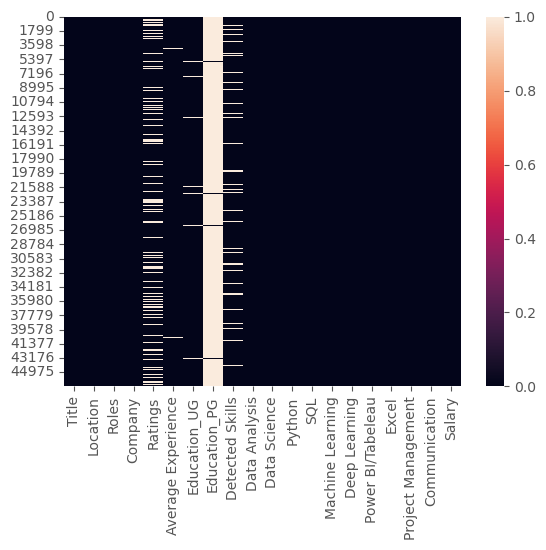

In [931]:
sns.heatmap(fdf1.isnull())  # Visualize the number of null values in each column

##### Here we can see there are a lot of null values in the Education_PG column. So removing the whole column is a good decision.

In [932]:
fdf1 = fdf1.drop("Education_PG",axis = 1)

In [933]:
fdf1.head()

Title   Location                      Roles  \
0            AI Data Engineer   Gurugram  Machine Learning Engineer   
1  Senior Staff Engineer - IT      Noida           Business Analyst   
2   Business Process Designer  Bengaluru                   IT Roles   
3              Data Scientist     Remote             Data Scientist   
4         Snowflake, DBT, AWS     Hybrid              Data Engineer   

                Company  Ratings  Average Experience  Education_UG  \
0  Teleperformance (TP)      3.9                 3.5  Any Graduate   
1                R1 RCM      3.8                 4.5  Any Graduate   
2             Accenture      3.7                17.5        B.Tech   
3    Kovaion Consulting      3.0                 5.5  Any Graduate   
4             tekskills      NaN                15.0  Any Graduate   

                                     Detected Skills Data Analysis  \
0                                                NaN            no   
1                                                NaN            no   
2  Communication, Data Analysis, Data Science, Pr...           yes   
3  Data Analysis, Data Science, Deep Learning, Ma...           yes   
4                                                SQL            no   

  Data Science Python  SQL Machine Learning Deep Learning Power BI/Tabeleau  \
0           no     no   no               no            no                no   
1           no     no   no               no            no                no   
2          yes     no  yes               no            no                no   
3          yes    yes   no              yes           yes                no   
4           no     no  yes               no            no                no   

  Excel Project Management Communication Salary  
0    no                 no            no   6-10  
1    no                 no            no   6-10  
2    no                yes           yes   6-10  
3    no                 no            no   6-10  
4    no                 no            no  10-15

In [934]:
for i in fdf1.columns:
    print(fdf1[i].value_counts())
    print("\n")

Title
Business Analyst                                                        2153
Data Engineer                                                           2120
Data Scientist                                                           886
Data Analyst                                                             882
AI / ML Engineer                                                         578
                                                                        ... 
AS400 Developer                                                            1
QA Automation                                                              1
AWS Certified Engineer                                                     1
Associate Architect - Data                                                 1
Franchise Business Development Head - K12 Schools, Skill Development       1
Name: count, Length: 15957, dtype: int64


Location
Bengaluru    10367
Hyderabad     5842
Pune          4535
Mumbai        4168
Chennai       2600


In [935]:
fdf1.loc[fdf1["Company"]== "-"]

Title   Location                      Roles  \
2268              Data Scientist  Hyderabad             Data Scientist   
11422             Data Scientist  Hyderabad             Data Scientist   
18114                 BI Engieer  Hyderabad           Business Analyst   
20192       Senior Data Engineer     Hybrid              Data Engineer   
20429   Data Analytical Engineer     Hybrid             Data Scientist   
22644  Big Data Developer Senior    Chennai              Data Engineer   
31702  Big Data Developer Senior    Chennai              Data Engineer   
38274  Big Data Developer Senior    Chennai              Data Engineer   
38413              Data Engineer    Chennai              Data Engineer   
42826       Senior Data Engineer     Hybrid  Machine Learning Engineer   
43148           Python Developer    Chennai              Data Engineer   
45747       Prompt Engineer- Job  Bengaluru              Data Engineer   
45904              Data Engineer       Pune              Data Engineer   

      Company  Ratings  Average Experience  Education_UG  \
2268        -      NaN                 9.0  Any Graduate   
11422       -      NaN                10.5  Any Graduate   
18114       -      NaN                 8.5  Any Graduate   
20192       -      NaN                 8.0        B.Tech   
20429       -      NaN                 8.5  Any Graduate   
22644       -      NaN                 8.5        B.Tech   
31702       -      NaN                 8.5  Any Graduate   
38274       -      NaN                 8.5  Any Graduate   
38413       -      NaN                 8.5  Any Graduate   
42826       -      NaN                 8.0  Any Graduate   
43148       -      NaN                 7.5        B.Tech   
45747       -      NaN                 6.0  Any Graduate   
45904       -      NaN                 8.0  Any Graduate   

                                         Detected Skills Data Analysis  \
2268                               Deep Learning, Python            no   
11422  Data Analysis, Data Science, Deep Learning, Py...           yes   
18114                                      Deep Learning            no   
20192                                        Python, SQL            no   
20429  Data Analysis, Data Science, Machine Learning,...           yes   
22644                    Project Management, Python, SQL            no   
31702                                                NaN            no   
38274                                                NaN            no   
38413           Data Analysis, Data Science, Python, SQL           yes   
42826            Deep Learning, Machine Learning, Python            no   
43148  Data Analysis, Deep Learning, Machine Learning...           yes   
45747                                             Python            no   
45904                                        Python, SQL            no   

      Data Science Python  SQL Machine Learning Deep Learning  \
2268            no    yes   no               no           yes   
11422          yes    yes   no               no           yes   
18114           no     no   no               no           yes   
20192           no    yes  yes               no            no   
20429          yes    yes   no              yes            no   
22644           no    yes  yes               no            no   
31702           no     no   no               no            no   
38274           no     no   no               no            no   
38413          yes    yes  yes               no            no   
42826           no    yes   no              yes           yes   
43148           no    yes   no              yes           yes   
45747           no    yes   no               no            no   
45904           no    yes  yes               no            no   

      Power BI/Tabeleau Excel Project Management Communication Salary  
2268                 no    no                 no            no  10-15  
11422                no    no                 no         

##### Here are some data in the company column where there are missing values but represented by "-"

In [936]:
 fdf1["Company"] = fdf1["Company"].replace("-",np.nan)

In [937]:
fdf1.loc[fdf1["Company"]== "-"]

Empty DataFrame
Columns: [Title, Location, Roles, Company, Ratings, Average Experience, Education_UG, Detected Skills, Data Analysis, Data Science, Python, SQL, Machine Learning, Deep Learning, Power BI/Tabeleau, Excel, Project Management, Communication, Salary]
Index: []

##### all the rows with "-" in the column company is replaced with "NaN"

In [938]:
fdf1 = fdf1.replace(["-", " "], np.nan)

##### Here in this code we replaced all the " " or "-" values with NaN

In [939]:
fdf1.isnull().sum()

Title                    0
Location                 0
Roles                    0
Company                 14
Ratings               9625
Average Experience      78
Education_UG           925
Detected Skills       4204
Data Analysis            0
Data Science             0
Python                   0
SQL                      0
Machine Learning         0
Deep Learning            0
Power BI/Tabeleau        0
Excel                    0
Project Management       0
Communication            0
Salary                   0
dtype: int64

#### So we are getting null values in 5 columns. And we have to now handle it

In [940]:
fdf1["Company"].nunique()

9412

##### The company column has so many unique values so we can use mode imputation method here.

In [941]:
mode_value = fdf1["Company"].mode()[0]
mode_value

'Accenture'

In [942]:
fdf1["Company"].fillna(mode_value, inplace=True)

In [943]:
fdf1["Ratings"] = fdf1["Ratings"].fillna(fdf1["Ratings"].mean())

##### In the above step we replaced missing values in the Ratings column by it's mean as it is a numerical column.

In [944]:
fdf1["Average Experience"] = fdf1["Average Experience"].fillna(fdf1["Average Experience"].mean())

##### In the above step we replaced missing values in the Average Experience column by it's mean as it is a numerical column.

In [945]:
mode_value = fdf1["Education_UG"].mode()[0]
mode_value

'Any Graduate'

In [946]:
fdf1["Education_UG"].fillna(mode_value, inplace=True)

##### We filled the missing values in the Education_UG column by its mode.

In [947]:
fdf1 = fdf1.drop("Detected Skills",axis =1)

##### We analysed that the "Detected Skills" is not relevant to the dataset so we deleted that column from the dataset.

In [948]:
fdf1.isnull().sum()

Title                 0
Location              0
Roles                 0
Company               0
Ratings               0
Average Experience    0
Education_UG          0
Data Analysis         0
Data Science          0
Python                0
SQL                   0
Machine Learning      0
Deep Learning         0
Power BI/Tabeleau     0
Excel                 0
Project Management    0
Communication         0
Salary                0
dtype: int64

In [949]:
fdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46761 entries, 0 to 46760
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               46761 non-null  object 
 1   Location            46761 non-null  object 
 2   Roles               46761 non-null  object 
 3   Company             46761 non-null  object 
 4   Ratings             46761 non-null  float64
 5   Average Experience  46761 non-null  float64
 6   Education_UG        46761 non-null  object 
 7   Data Analysis       46761 non-null  object 
 8   Data Science        46761 non-null  object 
 9   Python              46761 non-null  object 
 10  SQL                 46761 non-null  object 
 11  Machine Learning    46761 non-null  object 
 12  Deep Learning       46761 non-null  object 
 13  Power BI/Tabeleau   46761 non-null  object 
 14  Excel               46761 non-null  object 
 15  Project Management  46761 non-null  object 
 16  Comm

In [950]:
categorical_col = []
for i in fdf1.dtypes.index:
    if fdf1.dtypes[i] == "object":
        categorical_col.append(i)
print("Categorical Columns: ",categorical_col)
print("\n")

numerical_col = []
for i in fdf1.dtypes.index:
    if fdf1.dtypes[i] != "object":
        numerical_col.append(i)
print("Numerical Columns: ",numerical_col)
print("\n")

Categorical Columns:  ['Title', 'Location', 'Roles', 'Company', 'Education_UG', 'Data Analysis', 'Data Science', 'Python', 'SQL', 'Machine Learning', 'Deep Learning', 'Power BI/Tabeleau', 'Excel', 'Project Management', 'Communication', 'Salary']


Numerical Columns:  ['Ratings', 'Average Experience']




In [951]:
fdf1.nunique().to_frame("No. of unique values")

No. of unique values
Title                              15957
Location                             571
Roles                                 15
Company                             9412
Ratings                               42
Average Experience                    56
Education_UG                          15
Data Analysis                          2
Data Science                           2
Python                                 2
SQL                                    2
Machine Learning                       2
Deep Learning                          2
Power BI/Tabeleau                      2
Excel                                  2
Project Management                     2
Communication                          2
Salary                                 9

In [952]:
fdf1['Salary'].value_counts()

Salary
6-10       16571
10-15      10373
3-6         8188
15-25       5508
25-50       3550
0-3         1968
50-75        476
75-100        94
100-500       33
Name: count, dtype: int64

##### Here we can see the class imbalance issue as there is a huge number of difference in the number in the salary range, we will handle it later.

### Description of DataSet

In [953]:
fdf1.describe()

Ratings  Average Experience
count  46761.000000        46761.000000
mean       3.653417            6.515177
std        0.483701            3.749876
min        1.000000            0.500000
25%        3.500000            4.000000
50%        3.653417            5.500000
75%        3.800000            8.000000
max        5.000000           35.000000

##### This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative or invalid values present.From the above description we can observe the folllowing:-

1)The counts of all the columns are same which means there is no missing values in the dataset.

2)The mean of the data in the column Average Experience is more than the median which means the data in the column may be skewed to the right.

3)we can see there is huge difference between the 75% and max in the Average Experience column. Hence there may be outliers present in the data.

# Data Visualization

## Univariate analysis

Salary
6-10       16571
10-15      10373
3-6         8188
15-25       5508
25-50       3550
0-3         1968
50-75        476
75-100        94
100-500       33
Name: count, dtype: int64


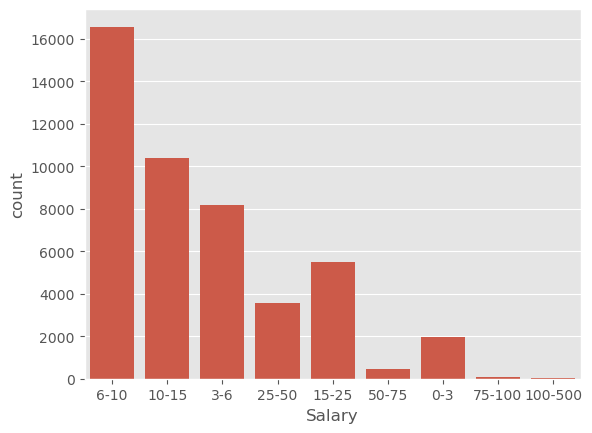

In [954]:
ax = sns.countplot(x = 'Salary', data = fdf1)
print(fdf1['Salary'].value_counts())

##### Here we can see class imbalance issue in the salary column.

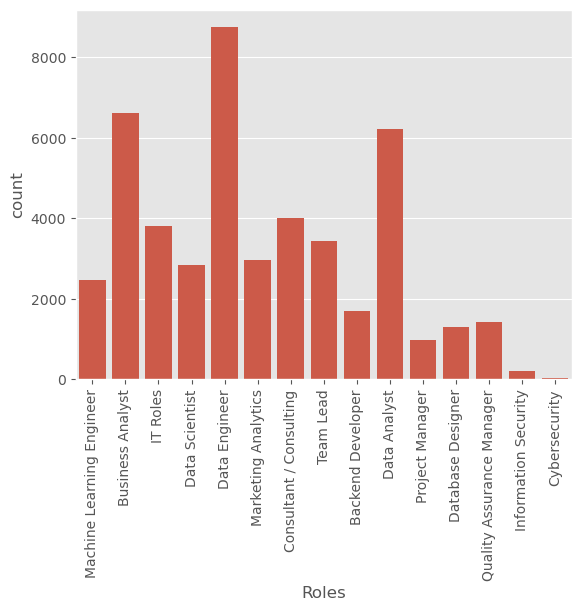

Roles
Data Engineer                8748
Business Analyst             6622
Data Analyst                 6227
Consultant / Consulting      4019
IT Roles                     3799
Team Lead                    3428
Marketing Analytics          2961
Data Scientist               2834
Machine Learning Engineer    2466
Backend Developer            1708
Quality Assurance Manager    1414
Database Designer            1313
Project Manager               968
Information Security          216
Cybersecurity                  38
Name: count, dtype: int64


In [955]:
ax = sns.countplot(x='Roles', data=fdf1)
plt.xticks(rotation=90)
plt.show()
print(fdf1['Roles'].value_counts())

##### we can see here that the majority roles are of Data Engineer,Data Analyst and Buisness Analyst and least roles are cybersecurity and information security.

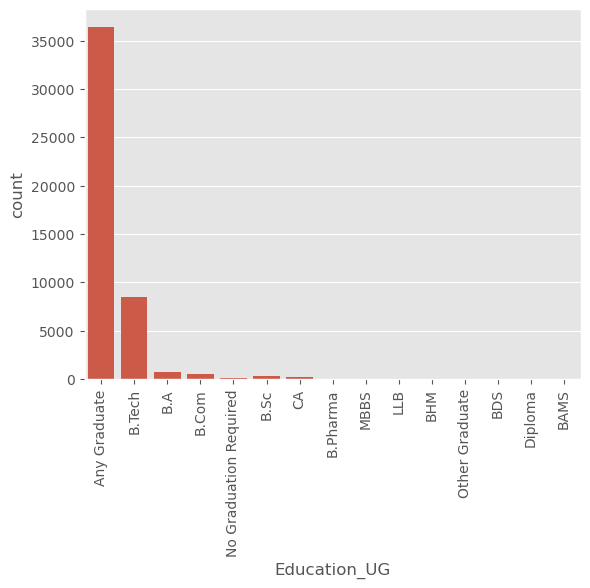

Education_UG
Any Graduate              36417
B.Tech                     8482
B.A                         763
B.Com                       486
B.Sc                        249
CA                          196
No Graduation Required      118
B.Pharma                     12
LLB                          12
Diploma                      11
MBBS                          7
BHM                           3
Other Graduate                2
BDS                           2
BAMS                          1
Name: count, dtype: int64


In [956]:
ax = sns.countplot(x='Education_UG', data=fdf1)
plt.xticks(rotation=90)
plt.show()
print(fdf1['Education_UG'].value_counts())

##### From the above graph we can see that the majority of the company prefers candidates from any graduate background.

In [957]:
skills_columns = [
    'Data Analysis', 'Data Science', 'Python', 'SQL', 'Machine Learning',
    'Deep Learning', 'Power BI/Tabeleau', 'Excel', 'Project Management', 'Communication'
]

# Create a new DataFrame with only the specified columns
new_df = fdf1[skills_columns].copy()

# Display the first few rows of the new DataFrame
print(new_df.head())

  Data Analysis Data Science Python  SQL Machine Learning Deep Learning  \
0            no           no     no   no               no            no   
1            no           no     no   no               no            no   
2           yes          yes     no  yes               no            no   
3           yes          yes    yes   no              yes           yes   
4            no           no     no  yes               no            no   

  Power BI/Tabeleau Excel Project Management Communication  
0                no    no                 no            no  
1                no    no                 no            no  
2                no    no                yes           yes  
3                no    no                 no            no  
4                no    no                 no            no  


<Figure size 1500x1000 with 0 Axes>

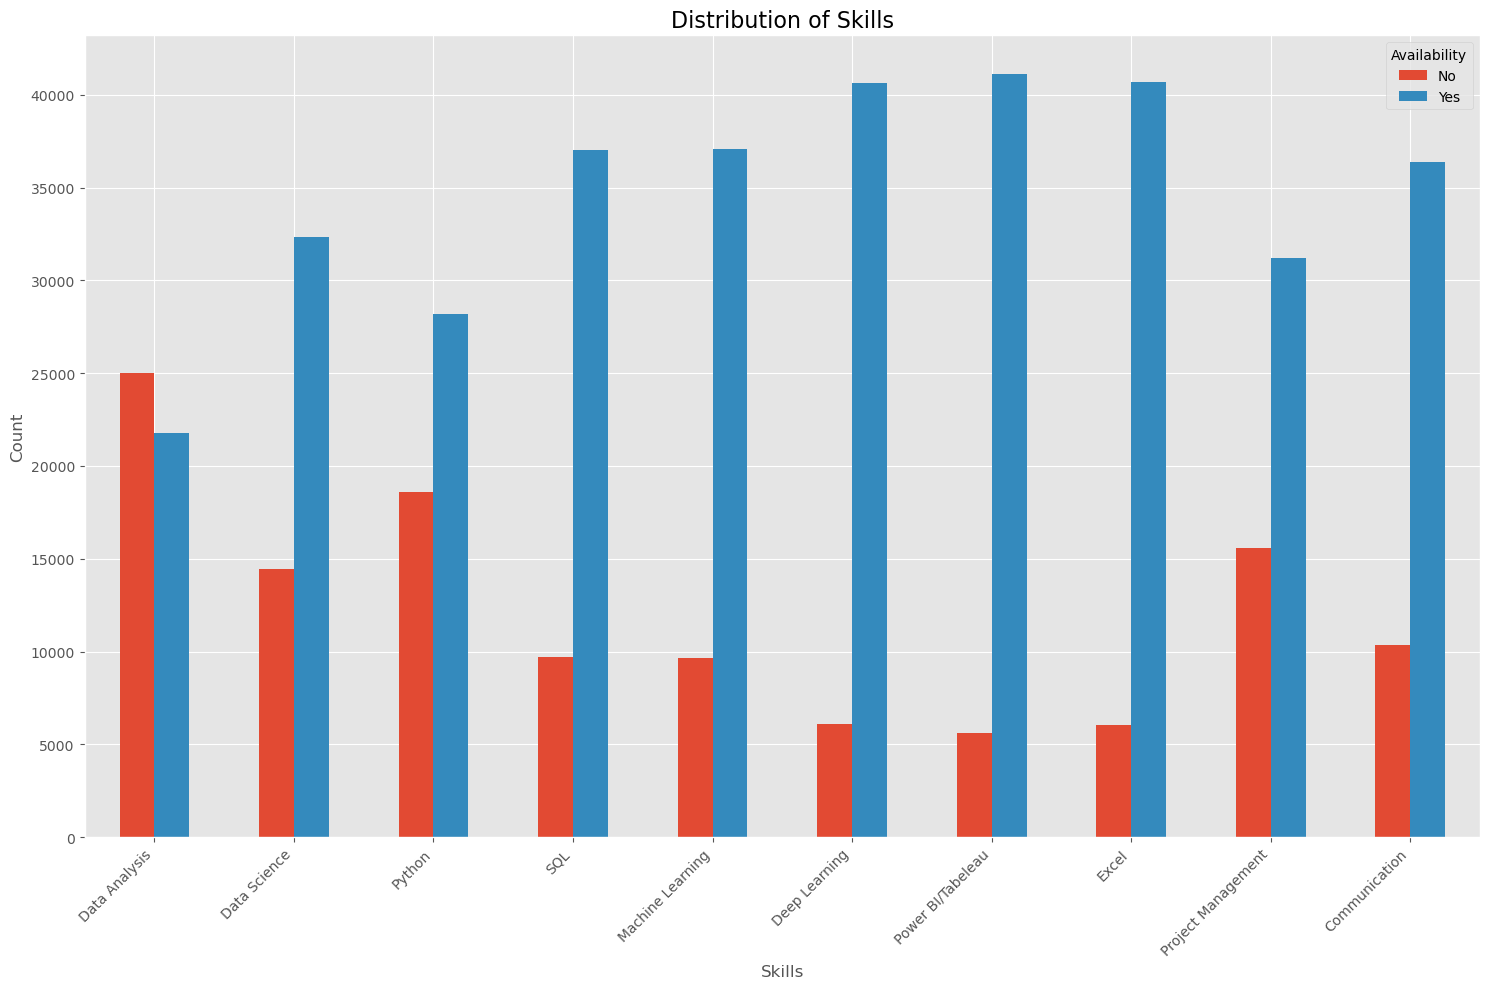

In [958]:
plot_data = pd.DataFrame()
for col in skills_columns:
    counts = new_df[col].value_counts()
    plot_data[col] = counts

plot_data = plot_data.T
plot_data.columns = ['No', 'Yes']

# Plotting the grouped bar chart
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
plot_data.plot(kind='bar', figsize=(15, 10), rot=45)
plt.title('Distribution of Skills', fontsize=16)
plt.xlabel('Skills', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Availability')
plt.show()

##### The primary insight from the chart is that for every skill listed, the number of job listings where the skill is not explicitly mentioned ('No') is overwhelmingly higher than the number of listings where it is mentioned ('Yes'). This suggests that while these skills are important in the job market, they may not be a formal requirement for the majority of positions in this dataset. This highlights their value as a competitive advantage for candidates.

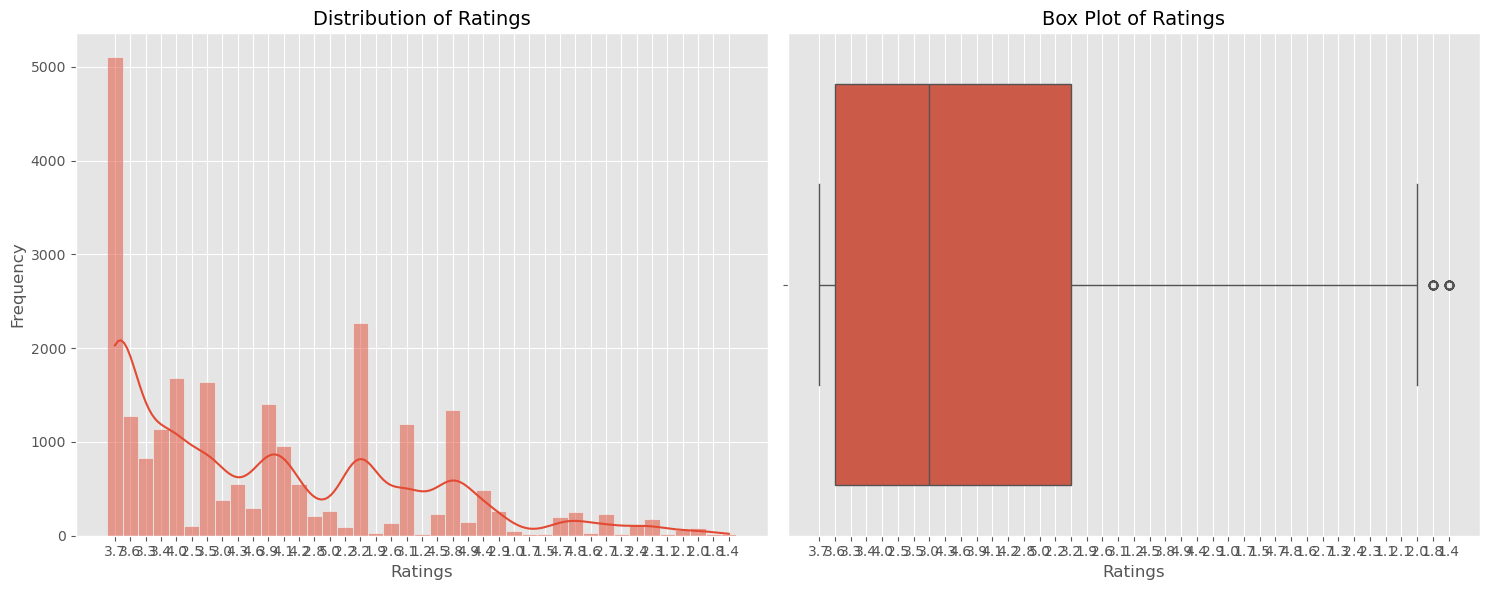

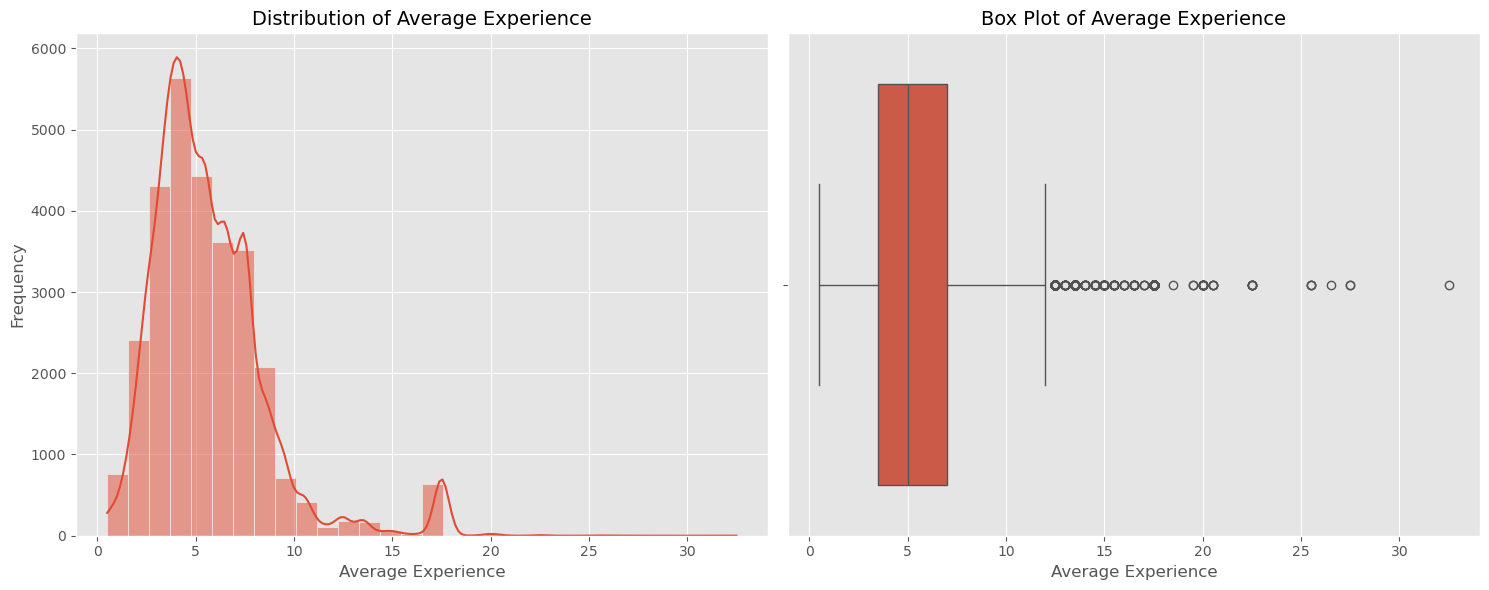

In [959]:
for col in numerical_col:
    plt.style.use('ggplot')
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}', fontsize=14)
    axes[0].set_xlabel(col, fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)


    sns.boxplot(x=df[col].dropna(), ax=axes[1])
    axes[1].set_title(f'Box Plot of {col}', fontsize=14)
    axes[1].set_xlabel(col, fontsize=12)
    
    plt.tight_layout()
    plt.savefig(f'{col}_univariate.png')
    plt.show()
    


##### Here we can see there is some outliers in the average experience and ratings column and the data is right skewed.

# Bivariate analysis

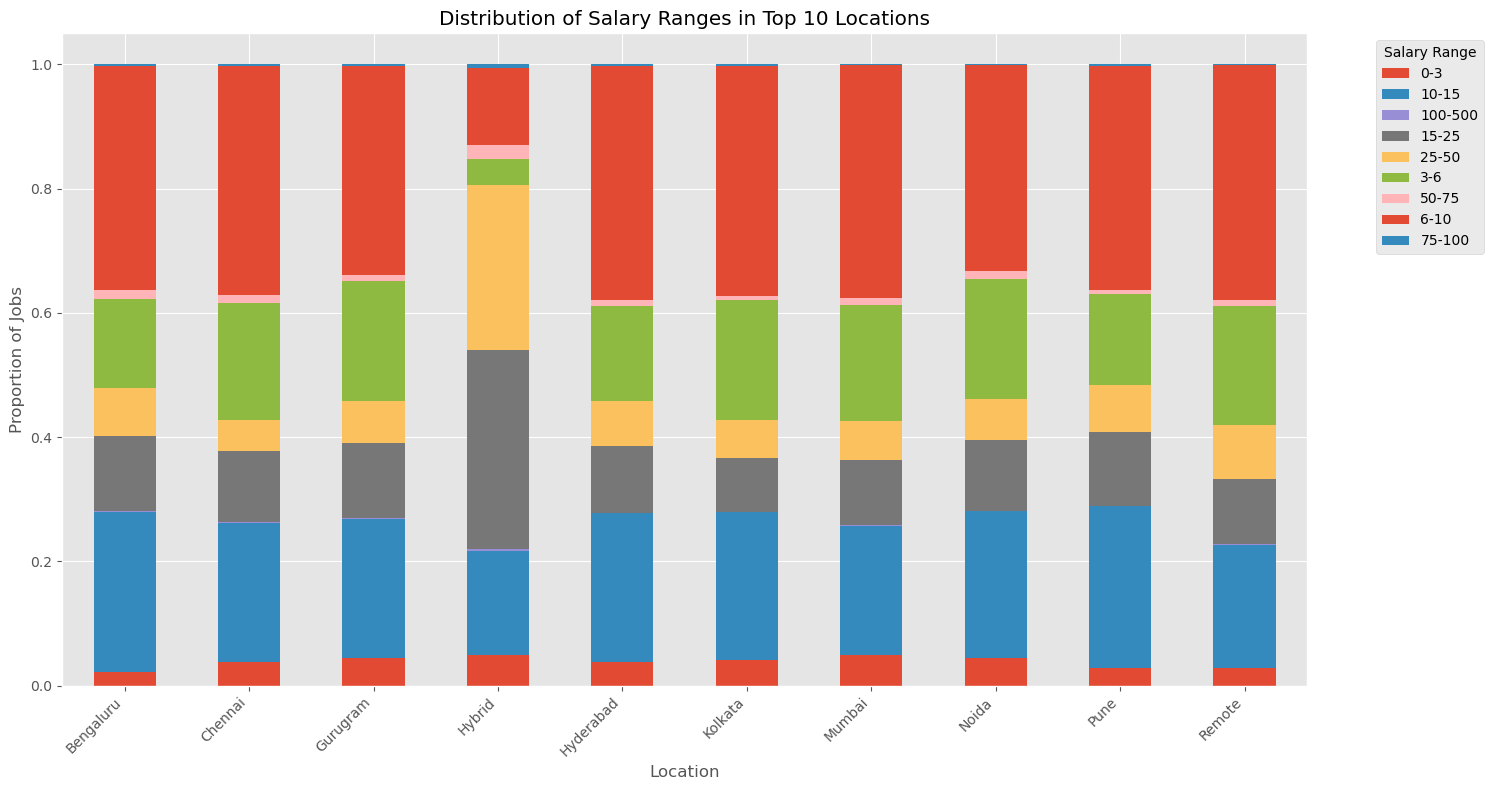

In [960]:
top_10_locations = fdf1['Location'].value_counts().head(10).index
df_top_locations = fdf1[fdf1['Location'].isin(top_10_locations)]
location_salary = pd.crosstab(df_top_locations['Location'], df_top_locations['Salary'])
location_salary = location_salary.div(location_salary.sum(1).astype(float), axis=0)
location_salary.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Distribution of Salary Ranges in Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Proportion of Jobs')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Salary Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('salary_by_location_bar_chart.png')
plt.show()

The stacked bar chart shows the distribution of salary ranges for the top 10 job locations.

1.Bengaluru, Pune, and Hyderabad have a more diverse distribution of salary ranges compared to other cities. They show a significant proportion of jobs in the higher salary brackets (e.g., 25-50 and above).

2.Gurugram, Chennai, and Mumbai have a very high concentration of jobs in the 6-10 salary range, suggesting that these cities might have a large number of jobs in the mid-level experience bracket.

3.The Remote location also shows a similar distribution, with a high proportion of jobs in the 6-10 range.

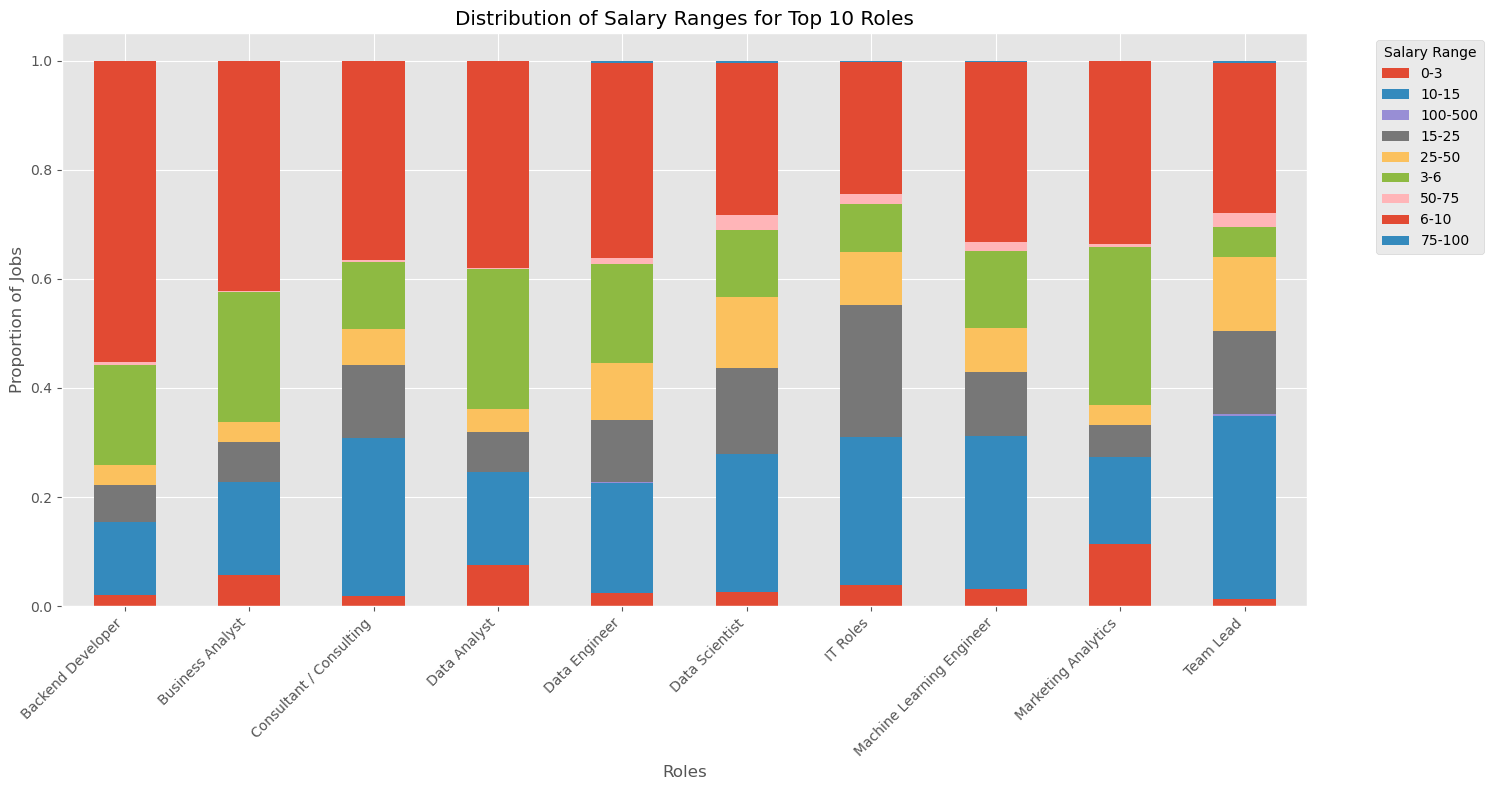

In [961]:
top_10_roles = fdf1['Roles'].value_counts().head(10).index
df_top_roles = fdf1[fdf1['Roles'].isin(top_10_roles)]
roles_salary = pd.crosstab(df_top_roles['Roles'], df_top_roles['Salary'])
roles_salary = roles_salary.div(roles_salary.sum(1).astype(float), axis=0)
roles_salary.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Distribution of Salary Ranges for Top 10 Roles')
plt.xlabel('Roles')
plt.ylabel('Proportion of Jobs')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Salary Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('salary_by_roles_bar_chart.png')
plt.show()

This chart displays the salary distribution for the top 10 most common job roles.

1.Roles such as Data Scientist, Data Analyst, and Business Analyst have a notable presence across various salary ranges, indicating a wide spectrum of experience and compensation levels within these fields.

2.Machine Learning Engineer roles appear to have a higher proportion of jobs in the upper salary brackets compared to other roles.

3.Conversely, roles like IT Roles, Software Engineer, and Team Lead seem to be heavily concentrated in the lower to mid-range salary brackets

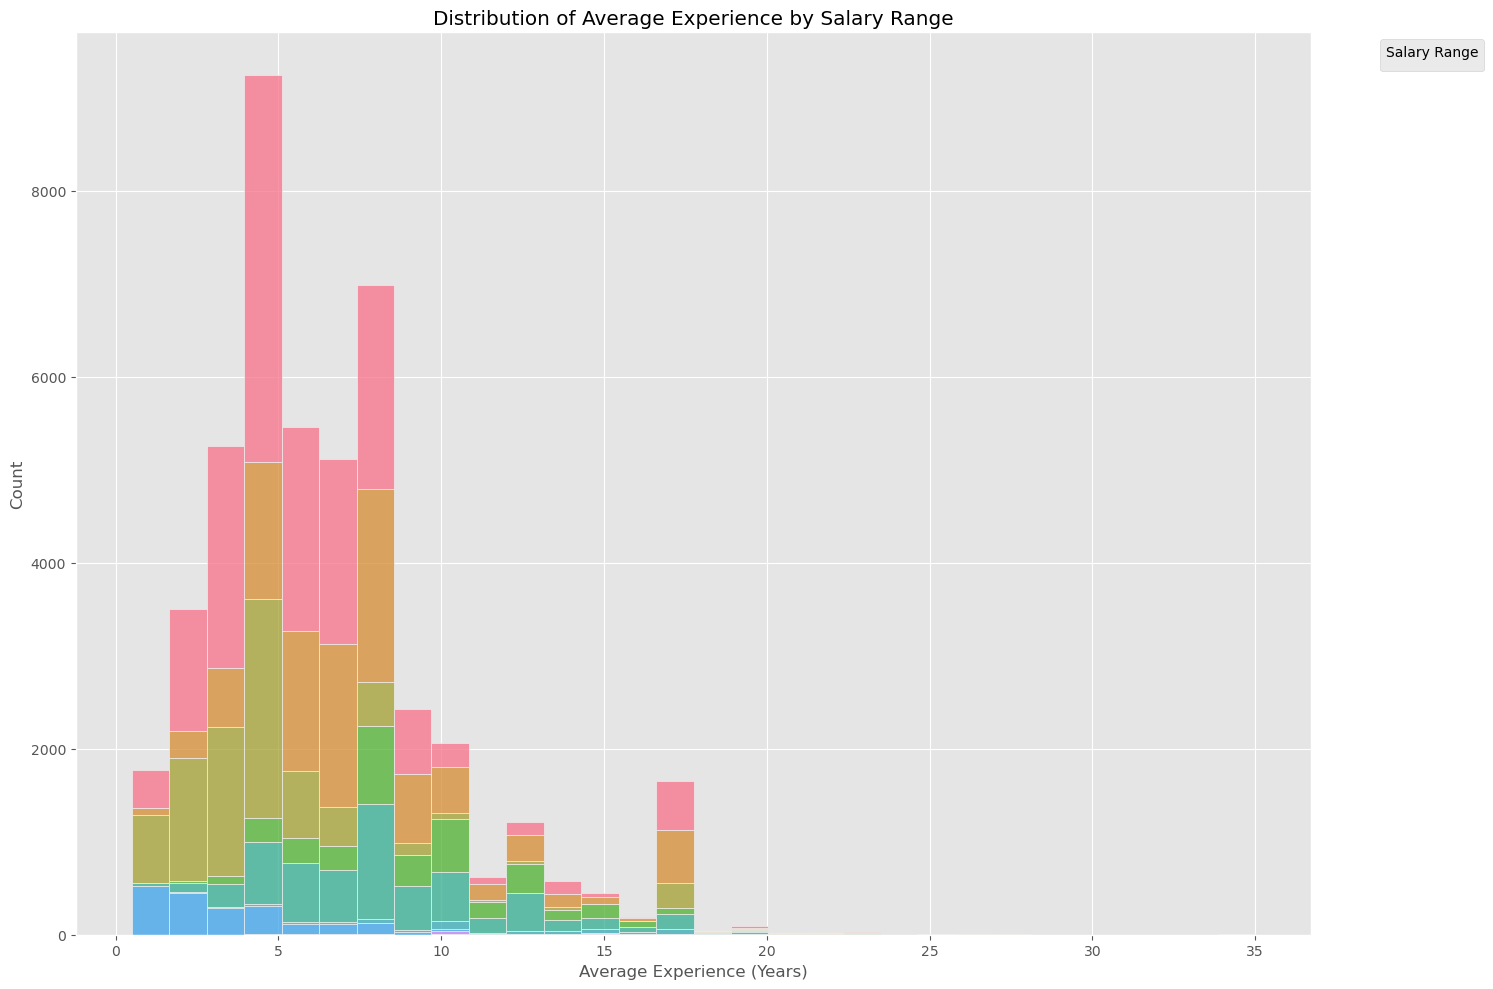

In [962]:
plt.figure(figsize=(15, 10))
sns.histplot(data=fdf1, x='Average Experience', hue='Salary', multiple='stack', bins=30)
plt.title('Distribution of Average Experience by Salary Range')
plt.xlabel('Average Experience (Years)')
plt.ylabel('Count')
plt.legend(title='Salary Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('experience_salary_histogram.png')
plt.show()

The stacked histogram visualizes the relationship between average experience and salary ranges.

1.There is a clear positive correlation between average experience and salary range. As the average experience increases, the dominant salary range also shifts to higher brackets.

2.For example, jobs with an average experience of 0-5 years are mostly in the 3-6 and 6-10 salary ranges.

3.As experience goes beyond 10 years, a higher proportion of jobs fall into the 15-25 and 25-50 salary ranges.

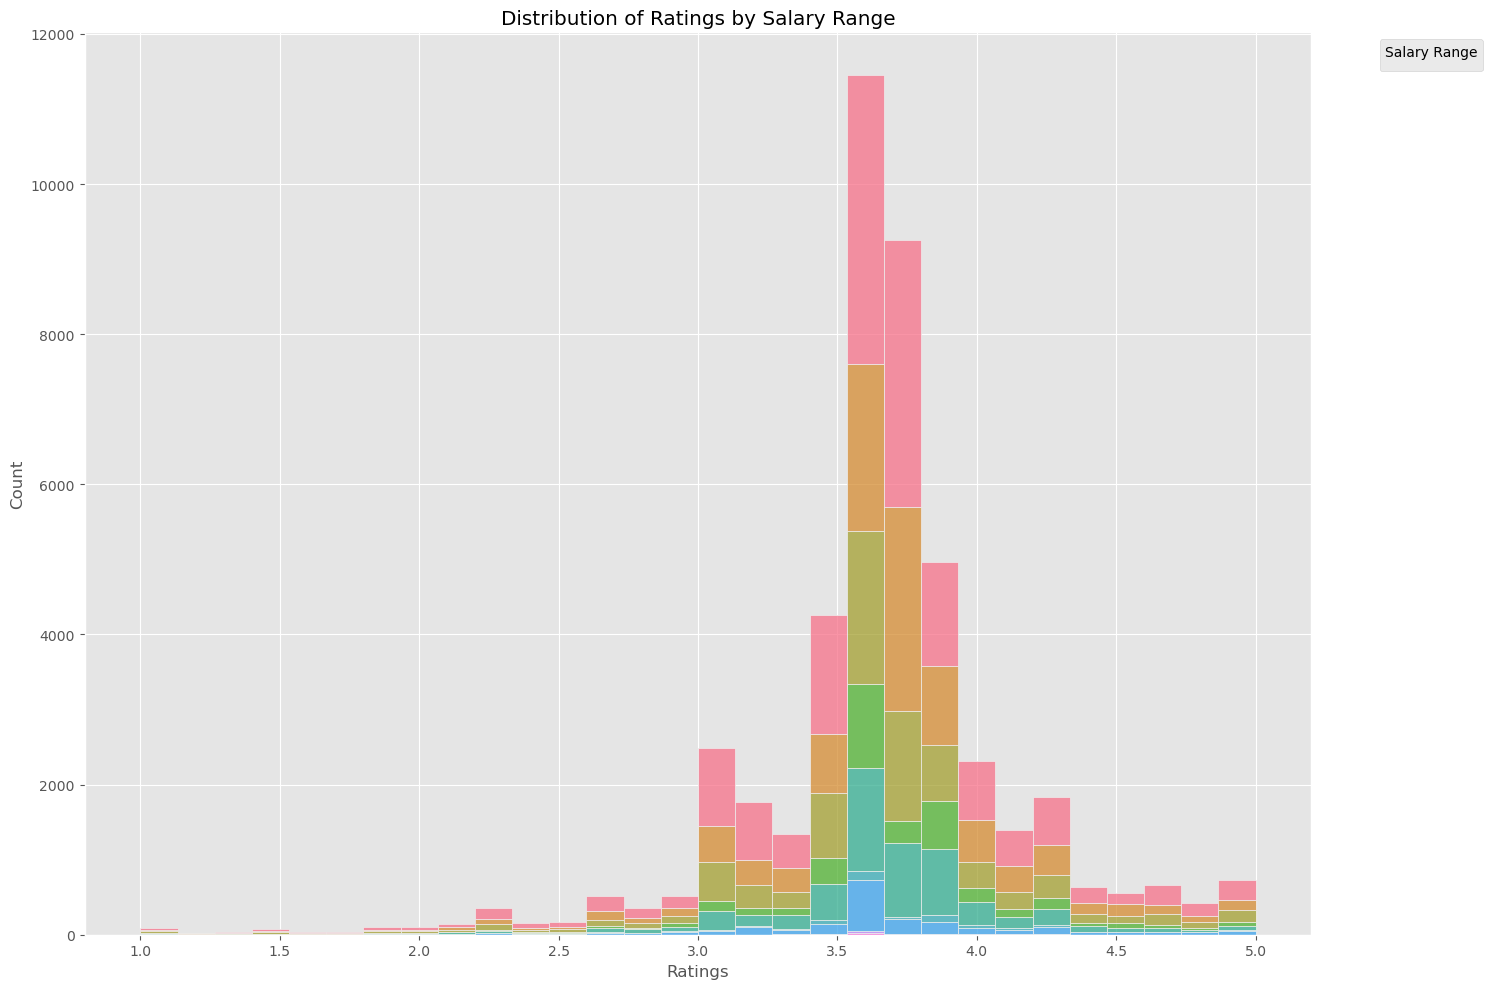

In [963]:
plt.figure(figsize=(15, 10))
sns.histplot(data=fdf1, x='Ratings', hue='Salary', multiple='stack', bins=30)
plt.title('Distribution of Ratings by Salary Range')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.legend(title='Salary Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('ratings_salary_histogram.png')
plt.show()

This stacked histogram shows how company ratings are distributed across different salary ranges.

1.Most of the job listings, regardless of the salary range, are from companies with ratings between 3.5 and 4.0.

2.There doesn't seem to be a strong, direct relationship between a company's rating and the salary range it offers. High salary ranges (25-50, 50-75,    etc.) are found at companies with a wide variety of ratings. though they are most common around the 3.5-4.0 range which is the most frequent rating overall.

3.This suggests that while high-paying jobs exist, they are not exclusively tied to companies with the highest possible ratings. The majority of job postings and thus the majority of salaries are concentrated around the average company rating.

In [964]:
sns.pairplot(fdf1, hue = 'Salary', palette = "bright")
plt.show()

The pair plot provides a visual summary of the relationships between Ratings, Average Experience, and Salary. By using Salary as the hue, we can see how the distribution of these two numerical variables differs across various salary brackets.

### 1. Distributions of Ratings and Average Experience
i. The diagonal of the pair plot shows the distribution of each variable. The distribution of Average Experience is right-skewed, with most of the data concentrated between 0 and 20 years.

ii. The distribution of Ratings is more bell-shaped, peaking between 3.5 and 4.0, indicating that most companies in the dataset have ratings in this range.

iii. Both distributions are broken down by salary range, with higher salary ranges showing a slight shift towards higher average experience, but no clear trend for ratings.

### 2. Relationship between 'Ratings' and 'Average Experience'
i. The scatter plot in the bottom-left of the pair plot shows the relationship between Ratings (x-axis) and Average Experience (y-axis).

ii. There is no strong correlation between these two variables. A company's rating does not appear to be a good predictor of the average experience of its employees.

iii. However, when colored by Salary, a clear pattern emerges. Jobs with a higher Average Experience tend to fall into higher salary brackets (e.g., 25-50, 50-75, 75-100). This confirms the positive relationship between experience and salary. But Ratings do not show a similar pattern with salary. Jobs across all salary ranges are found within the common rating bracket of 3.5 to 4 .

# Checking For Outliers

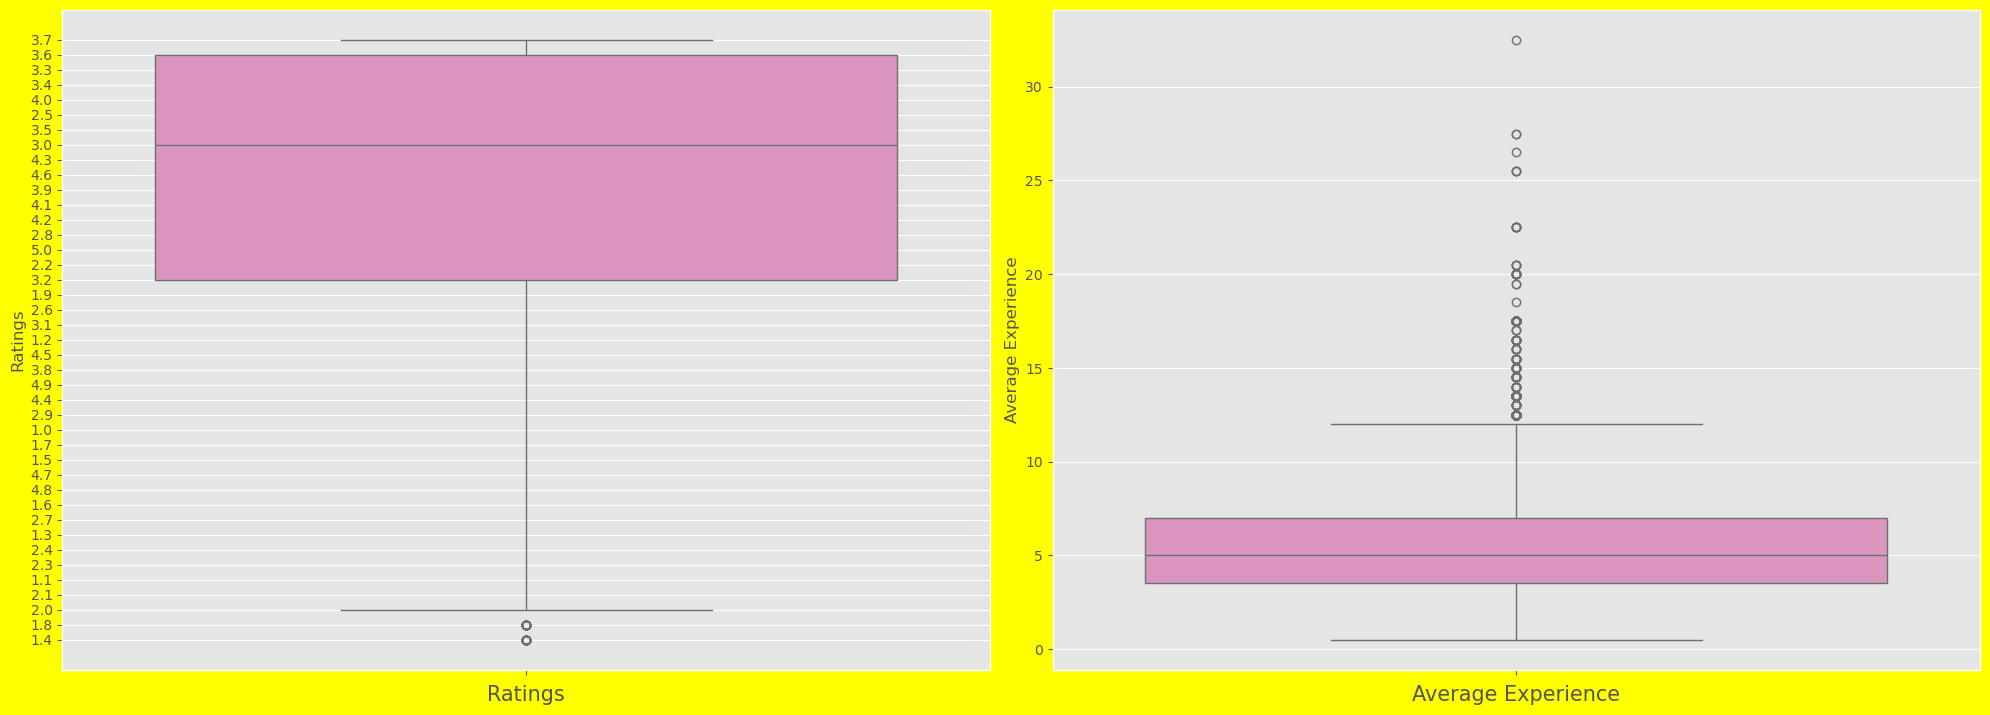

In [965]:
plt.figure(figsize = (20,14), facecolor = 'yellow')
plotnumber = 1
for col in numerical_col:
    if plotnumber<=2:
        ax = plt.subplot(2,2, plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
    plotnumber+=1
plt.tight_layout()

##### In Ratings column we can't see much outliers but there are many outliers present in the Average Experience column.

In [966]:
# Calculate the IQR for the 'Average Experience' column
Q1 = fdf1['Average Experience'].quantile(0.25)
Q3 = fdf1['Average Experience'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = fdf1[(fdf1['Average Experience'] >= lower_bound) & (fdf1['Average Experience'] <= upper_bound)]

In [967]:
len(fdf1) - len(df_cleaned)

2511

##### here we have 2511 outliers. So we need to handle them

##### as the number outliers is about 4-5 % of the whole data length, so we can remove it. 

In [968]:
fdf1 = fdf1[(fdf1['Average Experience'] >= lower_bound) & (fdf1['Average Experience'] <= upper_bound)]

In [969]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=fdf1['Average Experience'])
plt.title('Boxplot of Average Experience')
plt.xlabel('Average Experience (Years)')
plt.show()

##### Here we can see that most of the outliers are removed and now we can say it as a outlier free dataset.

# Checking And Removing Skewness

In [970]:
from scipy.stats import skew

In [972]:
numerical_cols1 = ['Ratings', 'Average Experience']

for col in numerical_cols1:
    skewness_value = fdf1[col].skew()
    print(f"Skewness of '{col}': {skewness_value}")

Skewness of 'Ratings': -0.796165204776116
Skewness of 'Average Experience': 0.5506870438158606


##### The default acceptable weight of skewness is -0.5 to +0.5. But it is not applicable to all kind of data we have to study it according to the data.

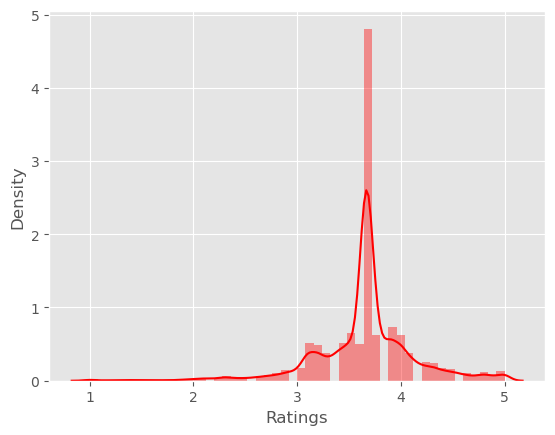

In [903]:
sns.distplot(fdf1['Ratings'], color = 'r')
plt.show()

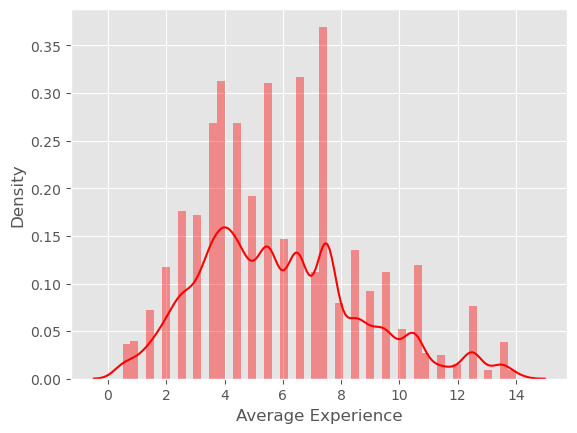

In [904]:
sns.distplot(fdf1['Average Experience'], color = 'r')
plt.show()

##### Here we can see Average Experience column is kind of normally distributed but Ratings column is left skewed.

In [973]:
ratings_data = fdf1['Ratings']

In [976]:
original_skewness = ratings_data.skew()
reflected_ratings = (ratings_data.max() + 1) - ratings_data
transformed_ratings = np.cbrt(reflected_ratings)

In [977]:
transformed_skewness = transformed_ratings.skew()
print(f"Transformed Skewness of 'Ratings': {transformed_skewness}")

Transformed Skewness of 'Ratings': -0.2779403172616403


In [978]:
fdf1['Transformed_Ratings'] = np.nan
fdf1.loc[ratings_data.index, 'Transformed_Ratings'] = transformed_ratings

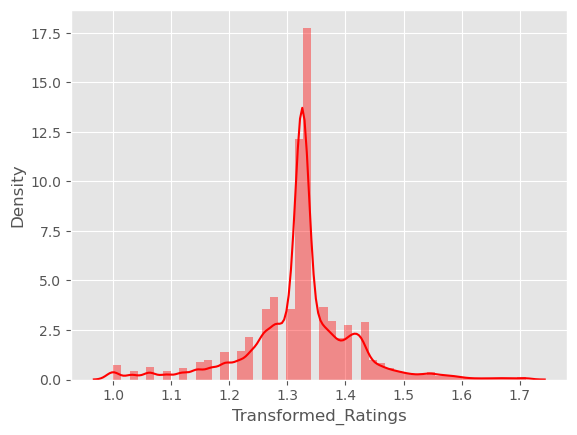

In [979]:
sns.distplot(fdf1['Transformed_Ratings'], color = 'r')
plt.show()

##### Now we can see that the Ratings Data are normally distributed and the skewness is removed.

# Encoding Categorical Columns

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in fdf1.columns:
    if fdf1[i].dtypes == 'object':
        fdf1[i] = OE.fit_transform(fdf1[i].values.reshape(-1,1))

In [982]:
fdf1

Title  Location  Roles  Company  Ratings  Average Experience  \
0        102.0     183.0   10.0   8013.0      3.9                 3.5   
1      12985.0     385.0    1.0   6473.0      3.8                 4.5   
3       4451.0     447.0    6.0   4594.0      3.0                 5.5   
5       3149.0     280.0   11.0   3760.0      3.1                 4.5   
6      13670.0       9.0    2.0   3995.0      2.3                 7.5   
...        ...       ...    ...      ...      ...                 ...   
46756   6291.0      70.0    1.0   7285.0      3.4                 6.5   
46757  11463.0     422.0   14.0   1149.0      3.9                10.5   
46758   7587.0     359.0    4.0   5730.0      3.8                 7.5   
46759  12080.0      70.0    5.0   2869.0      3.6                 8.5   
46760  13873.0      70.0    2.0    191.0      4.0                 4.5   

       Education_UG  Data Analysis  Data Science  Python  SQL  \
0               0.0            0.0           0.0     0.0  0.0   
1               0.0            0.0           0.0     0.0  0.0   
3               0.0            1.0           1.0     1.0  0.0   
5               0.0            0.0           0.0     0.0  0.0   
6               0.0            0.0           0.0     0.0  0.0   
...             ...            ...           ...     ...  ...   
46756           0.0            0.0           0.0     0.0  0.0   
46757           0.0            0.0           0.0     0.0  0.0   
46758           2.0            0.0           1.0     0.0  0.0   
46759           0.0            1.0           1.0     1.0  0.0   
46760           0.0            1.0           1.0     0.0  0.0   

       Machine Learning  Deep Learning  Power BI/Tabeleau  Excel  \
0                   0.0            0.0                0.0    0.0   
1                   0.0            0.0                0.0    0.0   
3                   1.0            1.0                0.0    0.0   
5                   0.0            0.0                0.0    0.0   
6                   0.0            0.0                0.0    0.0   
...                 ...            ...                ...    ...   
46756               0.0            0.0                0.0    0.0   
46757               0.0            0.0                0.0    0.0   
46758               0.0            0.0                0.0    0.0   
46759               1.0            0.0                0.0    0.0   
46760               0.0            0.0                0.0    0.0   

       Project Management  Communication  Salary  Transformed_Ratings  
0                     0.0            0.0     7.0             1.280579  
1                     0.0            0.0     7.0             1.300591  
3                     0.0            0.0     7.0             1.442250  
5                     0.0            0.0     5.0             1.426043  
6                     1.0            0.0     7.0             1.546680  
...                   ...            ...     ...                  ...  
46756                 0.0            0.0     7.0             1.375069  
46757                 1.0            0.0     4.0             1.280579  
46758                 0.0            0.0     4.0             1.300591  
46759                 0.0            0.0     7.0             1.338866  
46760                 0.0            0.0     5.0             1.259921  

[44250 rows x 19 columns]

In [984]:
fdf1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44250 entries, 0 to 46760
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                44250 non-null  float64
 1   Location             44250 non-null  float64
 2   Roles                44250 non-null  float64
 3   Company              44250 non-null  float64
 4   Ratings              44250 non-null  float64
 5   Average Experience   44250 non-null  float64
 6   Education_UG         44250 non-null  float64
 7   Data Analysis        44250 non-null  float64
 8   Data Science         44250 non-null  float64
 9   Python               44250 non-null  float64
 10  SQL                  44250 non-null  float64
 11  Machine Learning     44250 non-null  float64
 12  Deep Learning        44250 non-null  float64
 13  Power BI/Tabeleau    44250 non-null  float64
 14  Excel                44250 non-null  float64
 15  Project Management   44250 non-null  floa

##### We can check that all the categorical columns are encoded.

# Correlation between target and independent variables

In [987]:
cor = fdf1.corr()
cor

Title  Location     Roles   Company   Ratings  \
Title                1.000000 -0.013674  0.172112  0.059738  0.018391   
Location            -0.013674  1.000000  0.000923  0.084446 -0.039364   
Roles                0.172112  0.000923  1.000000  0.014591  0.020693   
Company              0.059738  0.084446  0.014591  1.000000 -0.032567   
Ratings              0.018391 -0.039364  0.020693 -0.032567  1.000000   
Average Experience   0.129850 -0.065458  0.119485  0.009520  0.055826   
Education_UG        -0.011139 -0.040723  0.043813 -0.025167  0.015725   
Data Analysis       -0.033133 -0.003821 -0.014891 -0.034143 -0.000443   
Data Science        -0.050199 -0.005705  0.019526 -0.000751  0.017334   
Python              -0.036599 -0.028149  0.044390  0.017655 -0.006273   
SQL                  0.009034 -0.017860 -0.048703 -0.014321  0.015049   
Machine Learning    -0.029398 -0.008760  0.112189  0.005686 -0.006851   
Deep Learning       -0.043834 -0.031126  0.062235  0.012671  0.013118   
Power BI/Tabeleau   -0.049170 -0.016917 -0.122715 -0.095527  0.012336   
Excel               -0.031609 -0.011527 -0.073171 -0.073041  0.008840   
Project Management   0.008462 -0.031138 -0.004680 -0.032222  0.014889   
Communication        0.010648 -0.021354  0.019744 -0.064973  0.016118   
Salary              -0.025730  0.009003 -0.094067  0.022299 -0.030269   
Transformed_Ratings -0.020132  0.034707 -0.021827  0.027239 -0.987670   

                     Average Experience  Education_UG  Data Analysis  \
Title                          0.129850     -0.011139      -0.033133   
Location                      -0.065458     -0.040723      -0.003821   
Roles                          0.119485      0.043813      -0.014891   
Company                        0.009520     -0.025167      -0.034143   
Ratings                        0.055826      0.015725      -0.000443   
Average Experience             1.000000      0.102639      -0.072253   
Education_UG                   0.102639      1.000000      -0.027691   
Data Analysis                 -0.072253     -0.027691       1.000000   
Data Science                   0.022835      0.053616       0.394200   
Python                         0.086147      0.055988       0.057993   
SQL                            0.086969      0.134458       0.039830   
Machine Learning               0.040976      0.022891       0.121346   
Deep Learning                  0.063896      0.086956       0.103228   
Power BI/Tabeleau             -0.028254      0.037793       0.185249   
Excel                         -0.069023      0.035287       0.142735   
Project Management             0.083980      0.051355      -0.055585   
Communication                  0.002400      0.092217      -0.011008   
Salary                        -0.159124     -0.054479      -0.010767   
Transformed_Ratings           -0.044530     -0.007489      -0.002300   

                     Data Science    Python       SQL  Machine Learning  \
Title                   -0.050199 -0.036599  0.009034         -0.029398   
Location                -0.005705 -0.028149 -0.017860         -0.008760   
Roles                    0.019526  0.044390 -0.048703          0.112189   
Company                 -0.000751  0.017655 -0.014321          0.005686   
Ratings                  0.017334 -0.006273  0.015049         -0.006851   
Average Experience       0.022835  0.086147  0.086969          0.040976   
Education_UG             0.053616  0.055988  0.134458          0.022891   
Data Analysis            0.394200  0.057993  0.039830          0.121346   
Data Science             1.000000  0.156255  0.126057          0.220071   
Python                   0.156255  1.000000  0.203183          0.447423   
SQL                      0.126057  0.203183  1.000000          0.067313   
Machine Learning         0.220071  0.447423  0.067313          1.000000   
Deep Learning            0.178358  0.235263  0.106472          0.422508   
Power BI/Tabeleau        0.132888  0.122762  0.191730          0.091293 

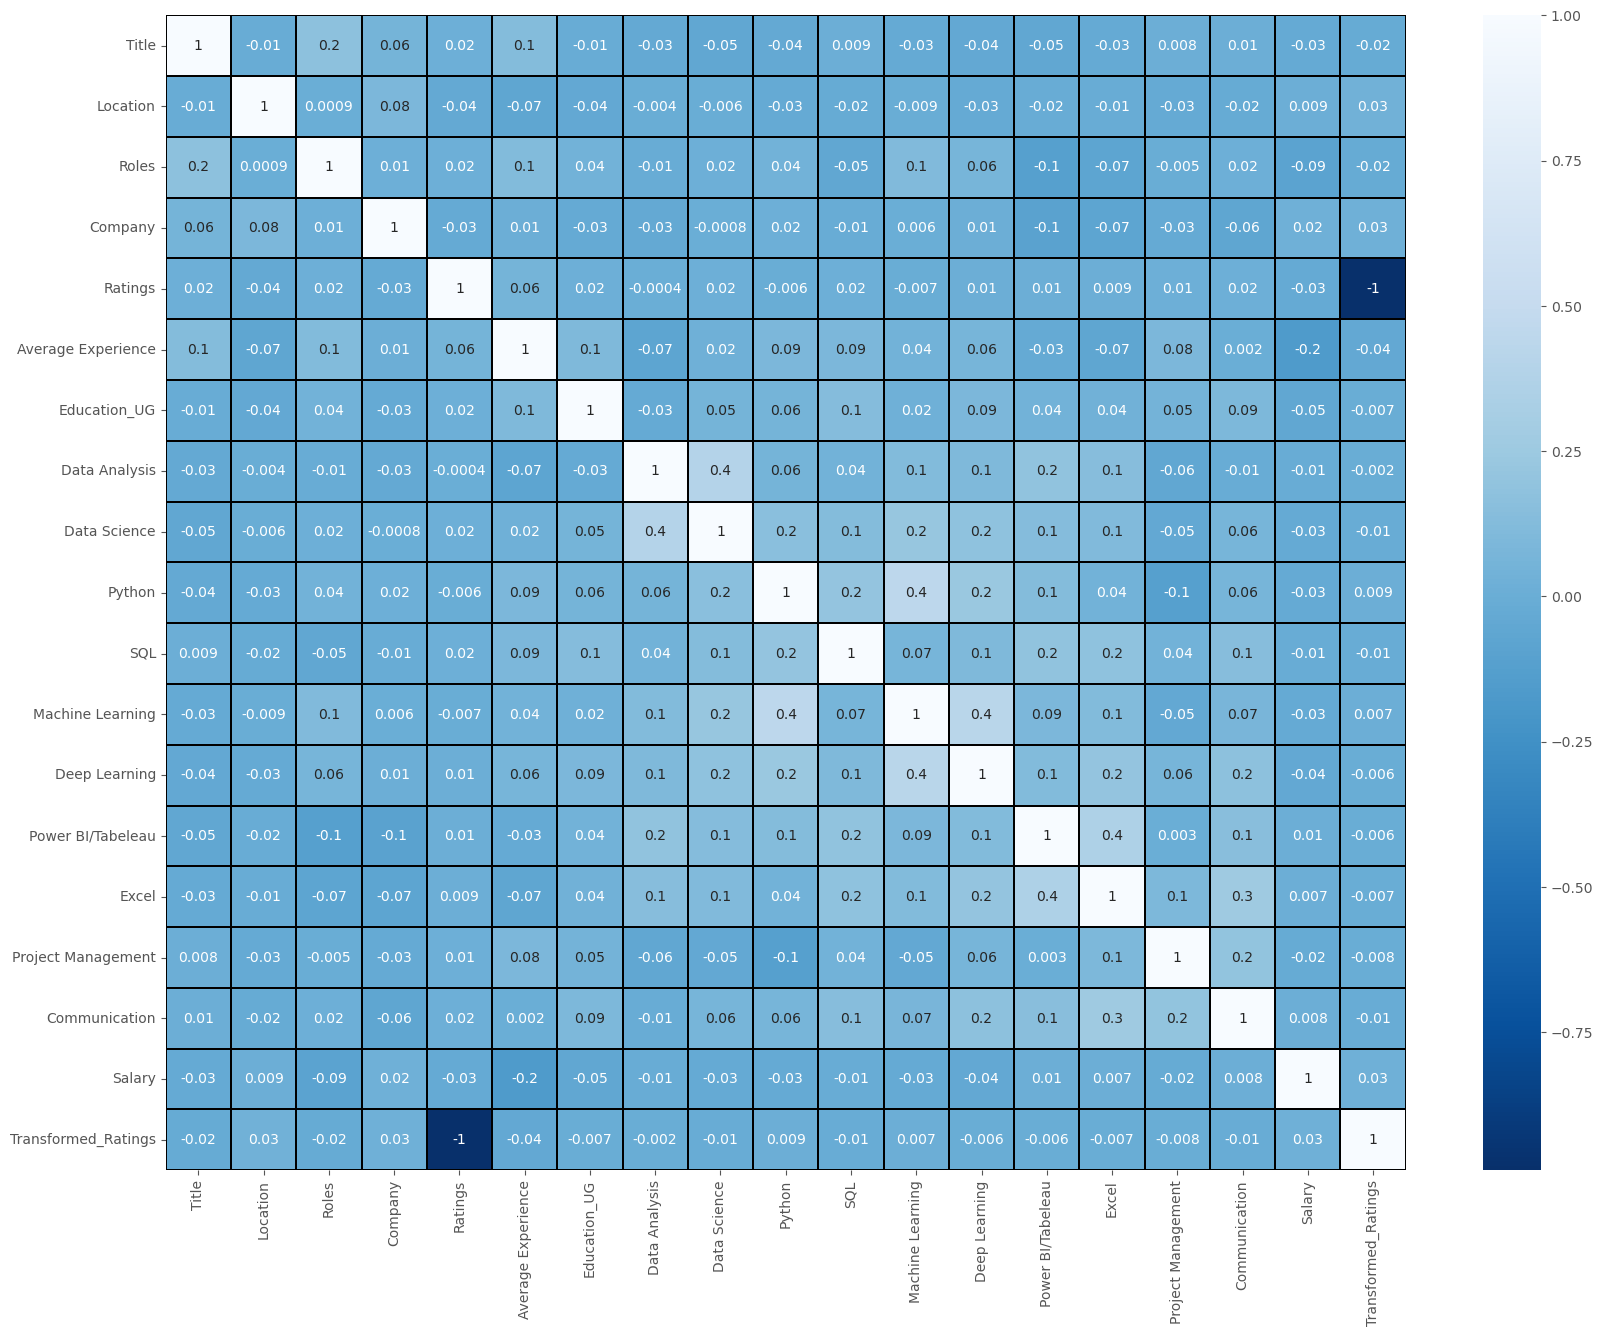

In [988]:
plt.figure(figsize = (20,15))
sns.heatmap(fdf1.corr(), linewidths = 0.1, linecolor = 'black', cmap = 'Blues_r', annot = True, fmt ='.1g')
plt.show()

In [995]:
fdf1 = fdf1.drop("Ratings", axis = 1)

##### Here we removed the original Ratings data as transformed ratings data is already there

##### This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between feature to feature and feature to label. This heatmap contains both positive and negative correlation.

There is no much positive correlation between the target and features.

## Separating features and label

In [997]:
x = fdf1.drop("Salary", axis =1)
y = fdf1["Salary"]

In [998]:
x

Title  Location  Roles  Company  Average Experience  Education_UG  \
0        102.0     183.0   10.0   8013.0                 3.5           0.0   
1      12985.0     385.0    1.0   6473.0                 4.5           0.0   
3       4451.0     447.0    6.0   4594.0                 5.5           0.0   
5       3149.0     280.0   11.0   3760.0                 4.5           0.0   
6      13670.0       9.0    2.0   3995.0                 7.5           0.0   
...        ...       ...    ...      ...                 ...           ...   
46756   6291.0      70.0    1.0   7285.0                 6.5           0.0   
46757  11463.0     422.0   14.0   1149.0                10.5           0.0   
46758   7587.0     359.0    4.0   5730.0                 7.5           2.0   
46759  12080.0      70.0    5.0   2869.0                 8.5           0.0   
46760  13873.0      70.0    2.0    191.0                 4.5           0.0   

       Data Analysis  Data Science  Python  SQL  Machine Learning  \
0                0.0           0.0     0.0  0.0               0.0   
1                0.0           0.0     0.0  0.0               0.0   
3                1.0           1.0     1.0  0.0               1.0   
5                0.0           0.0     0.0  0.0               0.0   
6                0.0           0.0     0.0  0.0               0.0   
...              ...           ...     ...  ...               ...   
46756            0.0           0.0     0.0  0.0               0.0   
46757            0.0           0.0     0.0  0.0               0.0   
46758            0.0           1.0     0.0  0.0               0.0   
46759            1.0           1.0     1.0  0.0               1.0   
46760            1.0           1.0     0.0  0.0               0.0   

       Deep Learning  Power BI/Tabeleau  Excel  Project Management  \
0                0.0                0.0    0.0                 0.0   
1                0.0                0.0    0.0                 0.0   
3                1.0                0.0    0.0                 0.0   
5                0.0                0.0    0.0                 0.0   
6                0.0                0.0    0.0                 1.0   
...              ...                ...    ...                 ...   
46756            0.0                0.0    0.0                 0.0   
46757            0.0                0.0    0.0                 1.0   
46758            0.0                0.0    0.0                 0.0   
46759            0.0                0.0    0.0                 0.0   
46760            0.0                0.0    0.0                 0.0   

       Communication  Transformed_Ratings  
0                0.0             1.280579  
1                0.0             1.300591  
3                0.0             1.442250  
5                0.0             1.426043  
6                0.0             1.546680  
...              ...                  ...  
46756            0.0             1.375069  
46757            0.0             1.280579  
46758            0.0             1.300591  
46759            0.0             1.338866  
46760            0.0             1.259921  

[44250 rows x 17 columns]

In [999]:
y

0        7.0
1        7.0
3        7.0
5        5.0
6        7.0
        ... 
46756    7.0
46757    4.0
46758    4.0
46759    7.0
46760    5.0
Name: Salary, Length: 44250, dtype: float64

##### We have separated the features and lables

# Feature Scaling

In [1000]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

Title  Location     Roles   Company  Average Experience  \
0     -1.527035 -0.397009  1.030979  1.228198           -0.860841   
1      1.319686  1.014387 -1.193921  0.696262           -0.503596   
2     -0.566049  1.447588  0.042135  0.047231           -0.146351   
3     -0.853748  0.280740  1.278190 -0.240843           -0.503596   
4      1.471049 -1.612767 -0.946710 -0.159671            0.568139   
...         ...       ...       ...       ...                 ...   
44245 -0.159469 -1.186553 -1.193921  0.976737            0.210894   
44246  0.983374  1.272910  2.019824 -1.142716            1.639874   
44247  0.126905  0.832722 -0.452287  0.439620            0.568139   
44248  1.119711 -1.186553 -0.205076 -0.548606            0.925384   
44249  1.515905 -1.186553 -0.946710 -1.473622           -0.503596   

       Education_UG  Data Analysis  Data Science    Python       SQL  \
0         -0.474405      -1.063191     -0.660612 -0.793772 -0.501835   
1         -0.474405      -1.063191     -0.660612 -0.793772 -0.501835   
2         -0.474405       0.940565      1.513747  1.259807 -0.501835   
3         -0.474405      -1.063191     -0.660612 -0.793772 -0.501835   
4         -0.474405      -1.063191     -0.660612 -0.793772 -0.501835   
...             ...            ...           ...       ...       ...   
44245     -0.474405      -1.063191     -0.660612 -0.793772 -0.501835   
44246     -0.474405      -1.063191     -0.660612 -0.793772 -0.501835   
44247      0.496545      -1.063191      1.513747 -0.793772 -0.501835   
44248     -0.474405       0.940565      1.513747  1.259807 -0.501835   
44249     -0.474405       0.940565      1.513747 -0.793772 -0.501835   

       Machine Learning  Deep Learning  Power BI/Tabeleau     Excel  \
0             -0.495051      -0.369591          -0.359966 -0.380878   
1             -0.495051      -0.369591          -0.359966 -0.380878   
2              2.019992       2.705697          -0.359966 -0.380878   
3             -0.495051      -0.369591          -0.359966 -0.380878   
4             -0.495051      -0.369591          -0.359966 -0.380878   
...                 ...            ...                ...       ...   
44245         -0.495051      -0.369591          -0.359966 -0.380878   
44246         -0.495051      -0.369591          -0.359966 -0.380878   
44247         -0.495051      -0.369591          -0.359966 -0.380878   
44248          2.019992      -0.369591          -0.359966 -0.380878   
44249         -0.495051      -0.369591          -0.359966 -0.380878   

       Project Management  Communication  Transformed_Ratings  
0               -0.697206      -0.520405            -0.449858  
1               -0.697206      -0.520405            -0.235925  
2               -0.697206      -0.520405             1.278411  
3               -0.697206      -0.520405             1.105164  
4                1.434296      -0.520405             2.394785  
...                   ...            ...                  ...  
44245           -0.697206      -0.520405             0.560244  
44246            1.434296      -0.520405            -0.449858  
44247           -0.697206      -0.520405            -0.235925  
44248           -0.697206      -0.520405             0.173232  
44249           -0.697206      -0.520405            -0.670695  

[44250 rows x 17 columns]

##### Here we Scaled the features by using standard scaler

# Checking and handeling Multicollinearity issue

In [1002]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif[" Features"] = x.columns

vif

VIF values             Features
0     1.057673                Title
1     1.015643             Location
2     1.081166                Roles
3     1.027967              Company
4     1.079491   Average Experience
5     1.044270         Education_UG
6     1.237014        Data Analysis
7     1.262424         Data Science
8     1.346287               Python
9     1.136041                  SQL
10    1.491828     Machine Learning
11    1.303090        Deep Learning
12    1.222052    Power BI/Tabeleau
13    1.268393                Excel
14    1.087046   Project Management
15    1.151718        Communication
16    1.004816  Transformed_Ratings

##### As we can see there is no multicollinearity issue in the dataset by checking its Variance Inflation Factor.

# Handeling the class imbalance issue in Salary Column

In [1004]:
y.value_counts()

Salary
7.0    15968
1.0     9653
5.0     7913
3.0     5131
4.0     3220
0.0     1963
6.0      316
8.0       65
2.0       21
Name: count, dtype: int64

##### Here we can see that the data is not balanced, since it is a classification problem, we will balance the data using oversampling method.

In [1006]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [1007]:
y1.value_counts()

Salary
7.0    15968
5.0    15968
1.0    15968
4.0    15968
3.0    15968
6.0    15968
0.0    15968
8.0    15968
2.0    15968
Name: count, dtype: int64

##### We have solved the class imbalance issue by using a oversampling technique SMOTE(Synthetic Minority Oversampling Technique)